

# **Business Understanding**
**"Pendekatan Cost-Sensitive Classification dalam Penentuan Income untuk Mendukung Risk-Based Lending"**

Stakeholder: Institusi Perbankan A

---

**1. Context**

Bank A merupakan bank ritel nasional yang saat ini berada dalam fase pengetatan manajemen risiko setelah mengalami peningkatan rasio Non-Performing Loan (NPL) dalam dua tahun terakhir. Kondisi tersebut dipicu oleh perlambatan ekonomi serta ekspansi kredit konsumtif tanpa agunan yang sebelumnya cukup agresif.

Sebagai respons, Bank A mengadopsi strategi yang lebih konservatif dengan fokus pada:

* Menurunkan rasio NPL
* Memperkuat kualitas portofolio kredit
* Menjaga stabilitas modal (Capital Adequacy Ratio / CAR)
* Mengurangi eksposur terhadap segmen berisiko tinggi

Namun, dalam praktik underwriting kredit, bank menghadapi tantangan bahwa tidak seluruh calon nasabah memiliki data pendapatan yang terverifikasi secara formal. Segmen seperti self-employed, pekerja informal, dan pelaku UMKM sering kali tidak memiliki slip gaji atau dokumen pendapatan yang valid.

Untuk mengatasi keterbatasan tersebut, Bank A mempertimbangkan pemanfaatan data demografis dan sosial-ekonomi sebagai proxy dalam mengestimasi kemampuan finansial nasabah.

Dataset Census Income menyediakan variabel-variabel seperti usia, tingkat pendidikan, jenis pekerjaan, jam kerja, capital gain/loss, serta kategori pendapatan tahunan (≤50K atau >50K). Data ini dapat dimanfaatkan untuk membangun model prediktif yang mengestimasi probabilitas seseorang memiliki income >50K sebagai indikator awal kemampuan bayar.

Model ini akan digunakan sebagai alat pre-screening dalam proses underwriting kredit untuk mendukung pengambilan keputusan berbasis risiko.

---

**2. Problem Statement**

Dalam proses pemberian kredit, Bank A menghadapi risiko kesalahan klasifikasi kemampuan finansial calon nasabah. Kesalahan tersebut berdampak langsung terhadap profitabilitas dan stabilitas portofolio kredit.

Kesalahan dapat terjadi dalam dua bentuk utama:

A. False Positive (FP)

Model memprediksi nasabah sebagai berpendapatan diatas 50k, padahal sebenarnya berpendapatan dibawah 50k.

Dampak bisnis:

* Pemberian limit kredit besar kepada nasabah berisiko
* Peningkatan Probability of Default (PD)
* Kerugian finansial aktual
* Kenaikan rasio NPL
* Kewajiban pencadangan (CKPN)
* Tekanan regulator terhadap kualitas aset

B. False Negative (FN)

Model memprediksi nasabah sebagai berpendapatan dibawah 50k, padahal sebenarnya berpendapatan diatas 50k.

Dampak bisnis:

* Penolakan nasabah potensial
* Kehilangan pendapatan bunga dan fee
* Opportunity loss

Dalam kondisi Bank A yang sedang memperketat manajemen risiko, False Positive merupakan risiko yang lebih kritikal karena berdampak langsung pada kerugian aktual dan kualitas portofolio kredit.

---

**3. Formulasi Cost of Error**

3.1 Asumsi Produk Kredit Tanpa Agunan

* Rata-rata limit kredit = Rp150.000.000
* Probability of Default (PD) = 30%
* Loss Given Default (LGD) = 80%

a. Kerugian False Positive

Expected Loss = Limit × PD × LGD
= 150.000.000 × 30% × 80%
= 150.000.000 × 0,3 × 0,8
= Rp36.000.000

Satu kasus False Positive berpotensi menyebabkan kerugian sebesar Rp36.000.000.

Jika terjadi 100 kasus FP:

Total Expected Loss
= 100 × 36.000.000
= Rp3.600.000.000

Kerugian ini bersifat aktual dan memengaruhi laba bersih serta rasio NPL.

---

b. Kerugian False Negative

Asumsi:

* Rata-rata revenue tahunan = Rp6.000.000
* Durasi hubungan nasabah = 4 tahun

Customer Lifetime Value (CLV):

= 6.000.000 × 4
= Rp24.000.000

Diasumsikan realisasi efektif 60%:

Effective Opportunity Loss
= 24.000.000 × 60%
= Rp14.400.000

Satu kasus False Negative menyebabkan kehilangan potensi sekitar Rp14.400.000.

---

3.2 Perbandingan Dampak Finansial

FP = Rp36.000.000
FN = Rp14.400.000

False Positive memiliki dampak finansial sekitar 2,5 kali lebih besar dibanding False Negative.

Total Cost Function:

Total Cost = (FP × 36.000.000) + (FN × 14.400.000)

Model terbaik adalah model yang meminimalkan total expected cost tersebut.

---

**4. Goals**

Berdasarkan kondisi dan risiko yang dihadapi Bank A, tujuan utama dari analisis ini adalah:

1. Mengidentifikasi faktor demografis dan sosial-ekonomi yang berkorelasi dengan kategori pendapatan, sehingga bank memahami karakteristik individu dengan probabilitas income tinggi maupun rendah.

2. Mengembangkan model klasifikasi untuk memprediksi probabilitas income >50K sebagai proxy kemampuan bayar calon nasabah dalam tahap pre-screening kredit.

3. Mengintegrasikan hasil prediksi model sebagai komponen tambahan dalam proses underwriting guna mendukung pengambilan keputusan berbasis risiko dan berbasis data.

---

**5. Analytic Approach**

Pendekatan analitik dilakukan secara terstruktur dengan mempertimbangkan aspek statistik dan dampak finansial.

Analisis diawali dengan eksplorasi data untuk memahami distribusi kategori income, mengidentifikasi potensi ketidakseimbangan kelas, serta mengevaluasi hubungan antara variabel demografis dan sosial-ekonomi terhadap tingkat pendapatan.

Selanjutnya dilakukan proses preprocessing untuk memastikan kualitas data dan kesiapan fitur sebelum pembangunan model klasifikasi. Model dikembangkan untuk memprediksi probabilitas income >50K melalui proses validasi silang dan penyesuaian parameter agar diperoleh performa optimal.

Karena dataset berpotensi mengalami class imbalance dan terdapat perbedaan biaya kesalahan antara False Positive dan False Negative, accuracy tidak digunakan sebagai metrik utama. Evaluasi difokuskan pada F0.5-score, yang memberikan bobot lebih besar pada precision dibanding recall. Pendekatan ini selaras dengan strategi konservatif Bank A yang memprioritaskan pengendalian risiko kredit dan meminimalkan False Positive.

Selain itu, evaluasi juga mempertimbangkan perhitungan expected cost untuk memastikan bahwa model yang dipilih tidak hanya optimal secara statistik, tetapi juga optimal secara ekonomi.

Sebagai langkah akhir, dilakukan penyesuaian threshold probabilitas guna menemukan titik keputusan yang mampu meminimalkan total expected cost dan menjaga kualitas portofolio kredit.

---


# **Data Understanding**



| Nama Variabel         | Deskripsi                                                                                             |
| --------------------- | ----------------------------------------------------------------------------------------------------- |
| Age                   | Usia individu dalam tahun.                                                                            |
| Workclass             | Jenis atau sektor tempat individu bekerja (swasta, pemerintah, wiraswasta, dll.).                     |
| fnlwgt (Final Weight) | Bobot sampel dari sensus yang merepresentasikan jumlah populasi yang diwakili oleh individu tersebut. |
| Education             | Tingkat pendidikan terakhir yang ditempuh individu.                                                   |
| EducationNum          | Representasi numerik dari tingkat pendidikan (versi ordinal dari Education).                          |
| Marital Status        | Status pernikahan individu.                                                                           |
| Occupation            | Jenis atau bidang pekerjaan individu.                                                                 |
| Relationship          | Peran individu dalam rumah tangga (misalnya suami, istri, anak, dll.).                                |
| Race                  | Ras atau latar belakang etnis individu.                                                               |
| Gender                | Jenis kelamin individu.                                                                               |
| Capital Gain          | Keuntungan yang diperoleh dari investasi atau penjualan aset.                                         |
| Capital Loss          | Kerugian yang dialami dari investasi atau penjualan aset.                                             |
| Hours per Week        | Jumlah jam kerja individu dalam satu minggu.                                                          |
| Native Country        | Negara asal individu.                                                                                 |
| Income                | Kategori pendapatan tahunan individu (≤50K atau >50K).                                                |



# **Importing Data and Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
!pip install category_encoders
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# base algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# ensemble various
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data= pd.read_csv('adult.csv')
test_data= pd.read_csv('adult.test.csv')

In [3]:
train_data.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_data.head()

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [5]:
#Menyamakan kolom train dan test
columns=train_data.columns
test_data.columns=columns

In [6]:
#menggabungkan data train dan test
df = pd.concat([train_data, test_data], axis= 0)

In [7]:
display (df.head(),df.tail())

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16279,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [8]:
#cek data
pd.set_option('display.max_colwidth',None)
print(f'Jumlah kolom: {df.shape[1]}, Jumlah baris: {df.shape[0]}')
pd.DataFrame(
    {
     'Column Name': df.columns.values,
     'Data Type': df.dtypes.values,
     'Null Values': df.isnull().sum().values,
     'Number of Unique': df.nunique().values,
     'Unique Sample':[df[col].unique() for col in df.columns]
    }
)

Jumlah kolom: 15, Jumlah baris: 48841


,Column Name,Data Type,Null Values,Number of Unique,Unique Sample
0,Age,int64,0,74,"[39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47, 46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58, 26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82, 83, 84, 85, 86, 87, 89]"
1,Workclass,object,0,9,"[ State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, ?, Self-emp-inc, Without-pay, Never-worked]"
2,Final Weight,int64,0,28522,"[77516, 83311, 215646, 234721, 338409, 284582, 160187, 209642, 45781, 159449, 280464, 141297, 122272, 205019, 121772, 245487, 176756, 186824, 28887, 292175, 193524, 302146, 76845, 117037, 109015, 216851, 168294, 180211, 367260, 193366, 190709, 266015, 386940, 59951, 311512, 242406, 197200, 544091, 84154, 265477, 507875, 88506, 172987, 94638, 289980, 337895, 144361, 128354, 101603, 271466, 32275, 226956, 51835, 251585, 109832, 237993, 216666, 56352, 147372, 188146, 59496, 293936, 149640, 116632, 105598, 155537, 183175, 169846, 191681, 200681, 101509, 309974, 162298, 211678, 124744, 213921, 32214, 212759, 309634, 125927, 446839, 276515, 51618, 159937, 343591, 346253, 268234, 202051, 54334, 410867, 249977, 286730, 212563, 117747, 226296, 115585, 191277, 202683, 171095, 249409, ...]"
3,Education,object,0,16,"[ Bachelors, HS-grad, 11th, Masters, 9th, Some-college, Assoc-acdm, Assoc-voc, 7th-8th, Doctorate, Prof-school, 5th-6th, 10th, 1st-4th, Preschool, 12th]"
4,EducationNum,int64,0,16,"[13, 9, 7, 14, 5, 10, 12, 11, 4, 16, 15, 3, 6, 2, 1, 8]"
5,Marital Status,object,0,7,"[ Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed]"
6,Occupation,object,0,15,"[ Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, Sales, Craft-repair, Transport-moving, Farming-fishing, Machine-op-inspct, Tech-support, ?, Protective-serv, Armed-Forces, Priv-house-serv]"
7,Relationship,object,0,6,"[ Not-in-family, Husband, Wife, Own-child, Unmarried, Other-relative]"
8,Race,object,0,5,"[ White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other]"
9,Gender,object,0,2,"[ Male, Female]"


**Penjelasan beberapa data kategori**


**Workclass**

| Kategori         | Penjelasan                                    |
| ---------------- | --------------------------------------------- |
| State-gov        | Bekerja di pemerintahan tingkat negara bagian |
| Federal-gov      | Bekerja di pemerintahan pusat                 |
| Local-gov        | Bekerja di pemerintahan daerah                |
| Private          | Bekerja di sektor swasta                      |
| Self-emp-not-inc | Wiraswasta tanpa badan usaha terdaftar        |
| Self-emp-inc     | Wiraswasta dengan badan usaha terdaftar       |
| Without-pay      | Bekerja tanpa dibayar                         |
| Never-worked     | Tidak pernah bekerja                          |
| ?                | Data tidak diketahui / missing                |

---

**Education**

| Kategori     | Penjelasan                                 |
| ------------ | ------------------------------------------ |
| Preschool    | Pendidikan pra-sekolah                     |
| 1st-4th      | SD kelas 1–4                               |
| 5th-6th      | SD kelas 5–6                               |
| 7th-8th      | SMP kelas 1–2                              |
| 9th          | SMP kelas 3                                |
| 10th         | SMA kelas 1                                |
| 11th         | SMA kelas 2                                |
| 12th         | SMA kelas 3 (tidak lulus)                  |
| HS-grad      | Lulus SMA                                  |
| Some-college | Kuliah tetapi belum lulus                  |
| Assoc-acdm   | Diploma/Associate akademik                 |
| Assoc-voc    | Diploma/Associate vokasional               |
| Bachelors    | Sarjana (S1)                               |
| Masters      | Magister (S2)                              |
| Prof-school  | Pendidikan profesi (setara S2 profesional) |
| Doctorate    | Doktor (S3)                                |

---
**Marital Status**

| Kategori              | Penjelasan                                    |
| --------------------- | --------------------------------------------- |
| Never-married         | Belum pernah menikah                          |
| Married-civ-spouse    | Menikah secara sipil                          |
| Married-spouse-absent | Menikah tetapi pasangan tidak tinggal bersama |
| Married-AF-spouse     | Menikah dengan pasangan anggota militer       |
| Divorced              | Bercerai                                      |
| Separated             | Berpisah                                      |
| Widowed               | Duda/Janda karena pasangan meninggal          |

---

**Occupation**

| Kategori          | Penjelasan                                     |
| ----------------- | ---------------------------------------------- |
| Adm-clerical      | Pekerjaan administrasi                         |
| Exec-managerial   | Eksekutif / manajerial                         |
| Handlers-cleaners | Pekerja kebersihan / pemindahan barang         |
| Prof-specialty    | Profesional spesialis (dokter, engineer, dll.) |
| Other-service     | Jasa lainnya                                   |
| Sales             | Penjualan                                      |
| Craft-repair      | Teknisi / perbaikan                            |
| Transport-moving  | Transportasi / logistik                        |
| Farming-fishing   | Pertanian / perikanan                          |
| Machine-op-inspct | Operator mesin / inspeksi                      |
| Tech-support      | Dukungan teknis                                |
| Protective-serv   | Keamanan / proteksi                            |
| Armed-Forces      | Angkatan bersenjata                            |
| Priv-house-serv   | Pekerja rumah tangga                           |
| ?                 | Data tidak diketahui                           |

---

**Relationship**

| Kategori       | Penjelasan                                 |
| -------------- | ------------------------------------------ |
| Husband        | Suami dalam rumah tangga                   |
| Wife           | Istri dalam rumah tangga                   |
| Own-child      | Anak kandung                               |
| Not-in-family  | Tidak tinggal dalam struktur keluarga inti |
| Unmarried      | Tidak menikah                              |
| Other-relative | Kerabat lain                               |

---

**Race**

| Kategori           | Penjelasan               |
| ------------------ | ------------------------ |
| White              | Ras kulit putih          |
| Black              | Ras kulit hitam          |
| Asian-Pac-Islander | Asia / Kepulauan Pasifik |
| Amer-Indian-Eskimo | Penduduk asli Amerika    |
| Other              | Ras lainnya              |

---


Permasalahan Data yang ditemukan

1. Terdapat tanda "?" pada kolom `workclass`,`occupation`,`Native Country`
2. Kolom Education dan Education num sefrekuensi
3. Terdapat kesalahan kepenulisan pada `Income`
4. Kategori pada education itu terlalu banyak dan bisa di regroping lagi
5. Terlalu banyak kategori `Native Country`
6. Final weight sebagai kolom Bobot sampel dari sensus yang merepresentasikan jumlah populasi yang diwakili oleh individu tersebut, sehingga tidak memberikan infromasi yang sesuai dengan kasus ini

In [9]:
# Menghapus spasi di awal dan akhir nilai pada semua kolom bertipe 'object'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

print("Spasi di awal dan akhir nilai pada kolom-kolom bertipe object telah dihapus.")
display(df.head())

Spasi di awal dan akhir nilai pada kolom-kolom bertipe object telah dihapus.


,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **Cek Duplikat**

In [10]:
df.duplicated().sum()


np.int64(29)

In [11]:
df[df.duplicated()]


,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

Untuk Melihat hubungan feature dengan target, maka kita cleaning terlebih dahulu data target

In [13]:
df['Income'] = df['Income'].str.strip().replace({
    '<=50K.': '<=50K',
    '>50K.': '>50K'
})

In [14]:
df['Income'].value_counts(normalize=True) * 100

Income
<=50K    76.061214
>50K     23.938786
Name: proportion, dtype: float64

Ternyata data imbalance

In [15]:
#Mengubah income menjadi 0 dan 1
#0 yaitu <=50k dan 1 >50k
df['income_binary'] = df['Income'].map({'<=50K':0, '>50K':1})

In [16]:
df['income_binary'].value_counts(normalize=True) * 100

income_binary
0    76.061214
1    23.938786
Name: proportion, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48812 entries, 0 to 16279
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48812 non-null  int64 
 1   Workclass       48812 non-null  object
 2   Final Weight    48812 non-null  int64 
 3   Education       48812 non-null  object
 4   EducationNum    48812 non-null  int64 
 5   Marital Status  48812 non-null  object
 6   Occupation      48812 non-null  object
 7   Relationship    48812 non-null  object
 8   Race            48812 non-null  object
 9   Gender          48812 non-null  object
 10  Capital Gain    48812 non-null  int64 
 11  capital loss    48812 non-null  int64 
 12  Hours per Week  48812 non-null  int64 
 13  Native Country  48812 non-null  object
 14  Income          48812 non-null  object
 15  income_binary   48812 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 6.3+ MB


Sekarang kita akan menghapus kolom `Income` karena sudah ada representasi biner `income_binary` yang akan digunakan sebagai target.

In [18]:
df = df.drop('Income', axis=1)
display(df.head())

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,income_binary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48812 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48812 non-null  int64 
 1   Workclass       48812 non-null  object
 2   Final Weight    48812 non-null  int64 
 3   Education       48812 non-null  object
 4   EducationNum    48812 non-null  int64 
 5   Marital Status  48812 non-null  object
 6   Occupation      48812 non-null  object
 7   Relationship    48812 non-null  object
 8   Race            48812 non-null  object
 9   Gender          48812 non-null  object
 10  Capital Gain    48812 non-null  int64 
 11  capital loss    48812 non-null  int64 
 12  Hours per Week  48812 non-null  int64 
 13  Native Country  48812 non-null  object
 14  income_binary   48812 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


# **Exploratory Data Analysis**

## **Numerikal Distribusi**

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,48812.0,38.647628,13.709006,17.0,28.0,37.0,48.0,90.0
Final Weight,48812.0,189667.144206,105607.191386,12285.0,117553.5,178138.5,237621.0,1490400.0
EducationNum,48812.0,10.078751,2.570245,1.0,9.0,10.0,12.0,16.0
Capital Gain,48812.0,1079.730824,7454.260737,0.0,0.0,0.0,0.0,99999.0
capital loss,48812.0,87.556093,403.122539,0.0,0.0,0.0,0.0,4356.0
Hours per Week,48812.0,40.425059,12.391081,1.0,40.0,40.0,45.0,99.0
income_binary,48812.0,0.239388,0.426714,0.0,0.0,0.0,0.0,1.0


In [21]:
sns.set_theme(style="whitegrid", palette='crest')

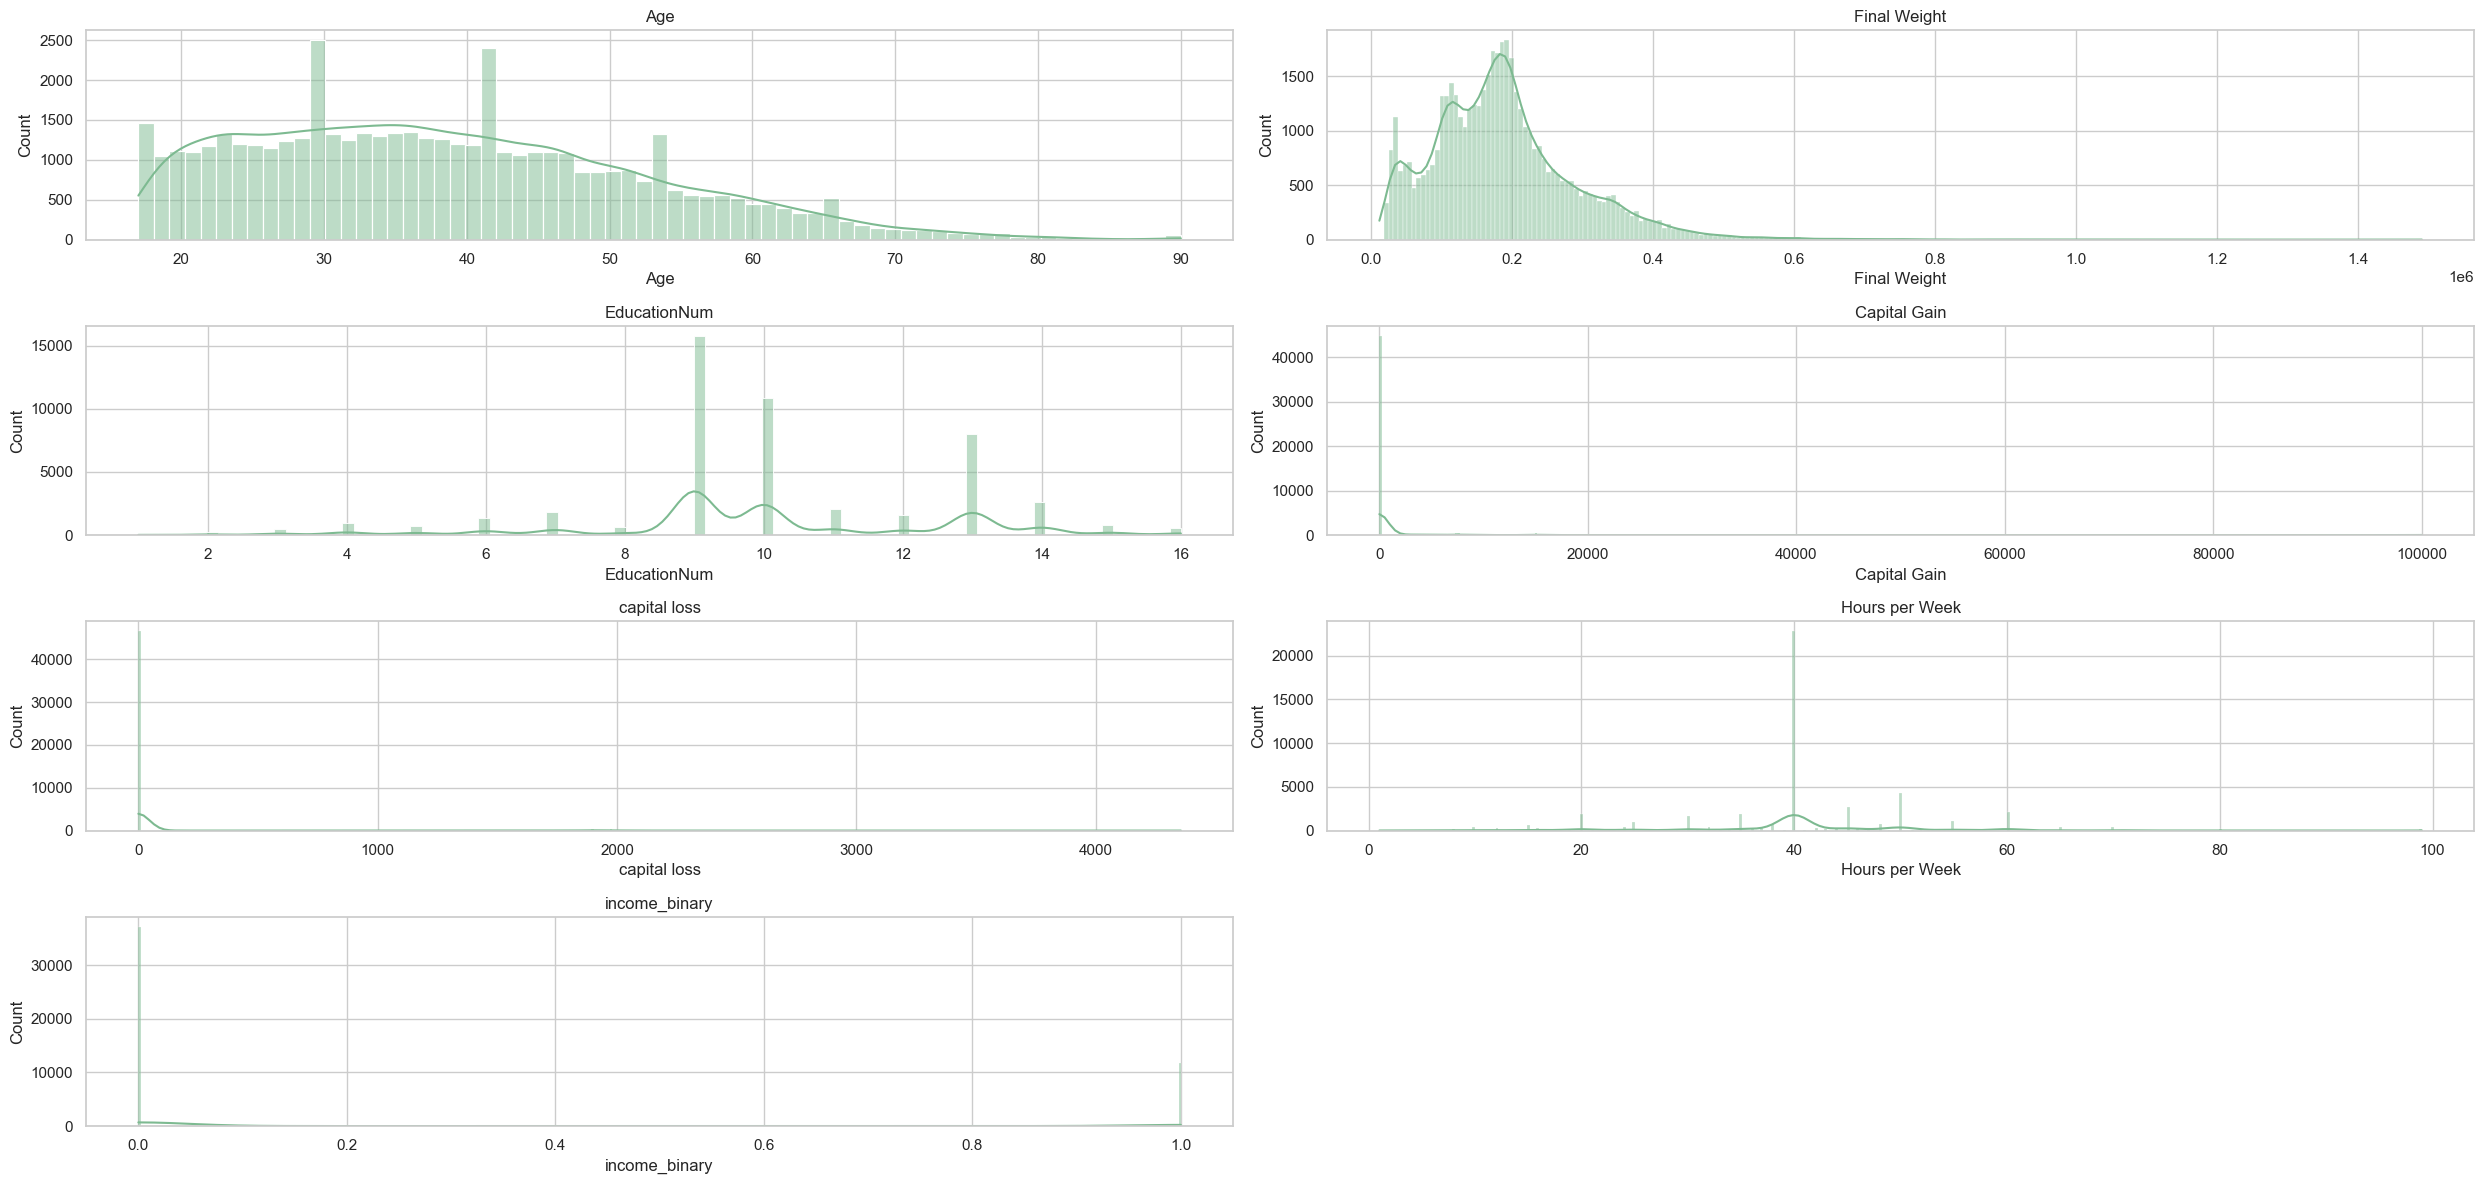

In [22]:
num_cols = ['Age', 'Final Weight', 'EducationNum',
            'Capital Gain', 'capital loss', 'Hours per Week','income_binary']

fig, axes = plt.subplots(4, 2, figsize=(25, 12))
axes = axes.flatten()

for i, col in enumerate(num_cols):

    if i < len(axes):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(col)
    else:
        break

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---
>**Insight Distribusi Numerik**
1. Age
- Mayoritas individu dengan konsentrasi tertinggi antara 20-45 tahun
- Puncak kepadatan ada di sekitar usia 30–40 tahun.
- Setelah usia 50 tahun, jumlah individu menurun tajam.

2. Final Weight
- Variabel ini biasanya merepresentasikan "bobot sensus" (berapa banyak orang yang diwakili oleh baris data tersebut).
- Sebagian besar data terkumpul di angka rendah (0 - 400.000)

3. EducationNum
- Puncak di angka 9: Lulusan SMA (High School grad) — ini adalah kelompok terbesar.
- Puncak di angka 10: Some college (Pernah kuliah tapi tidak selesai/Diploma).
- Puncak di angka 13: Lulusan Sarjana (Bachelors).
- Ini menunjukkan bahwa mayoritas tenaga kerja dalam dataset ini setidaknya tamatan SMA.

4. Capital Gain (Keuntungan Modal)
- Bentuk Distribusi: Ekstrim miring ke kanan (Extremely Right-skewed) & Terinflasi Nol (Zero-inflated).
- Lihat batang tinggi di angka 0. Ini berarti hampir semua orang (mayoritas mutlak) tidak memiliki keuntungan modal (capital gain) dari investasi/saham.

5. Capital Loss (Kerugian Modal)
- Sama seperti Capital Gain, mayoritas individu memiliki nilai 0.
- Ini menunjukkan bahwa investasi aset bukan sumber pendapatan atau kerugian utama bagi populasi umum dalam sensus ini.

6. Hours per Week (Jam Kerja per Minggu)
- Terdapat satu batang yang sangat tinggi tepat di angka 40 jam. Ini masuk akal karena 40 jam adalah standar jam kerja penuh waktu (full-time) di banyak negara (Senin-Jumat, 9-5).
- ada distribusi kecil di bawah 40 (pekerja paruh waktu/part-time) dan di atas 40 (lembur atau pekerja keras yang bekerja 50-60 jam/minggu).

---

## **Outlier Data Numerik**

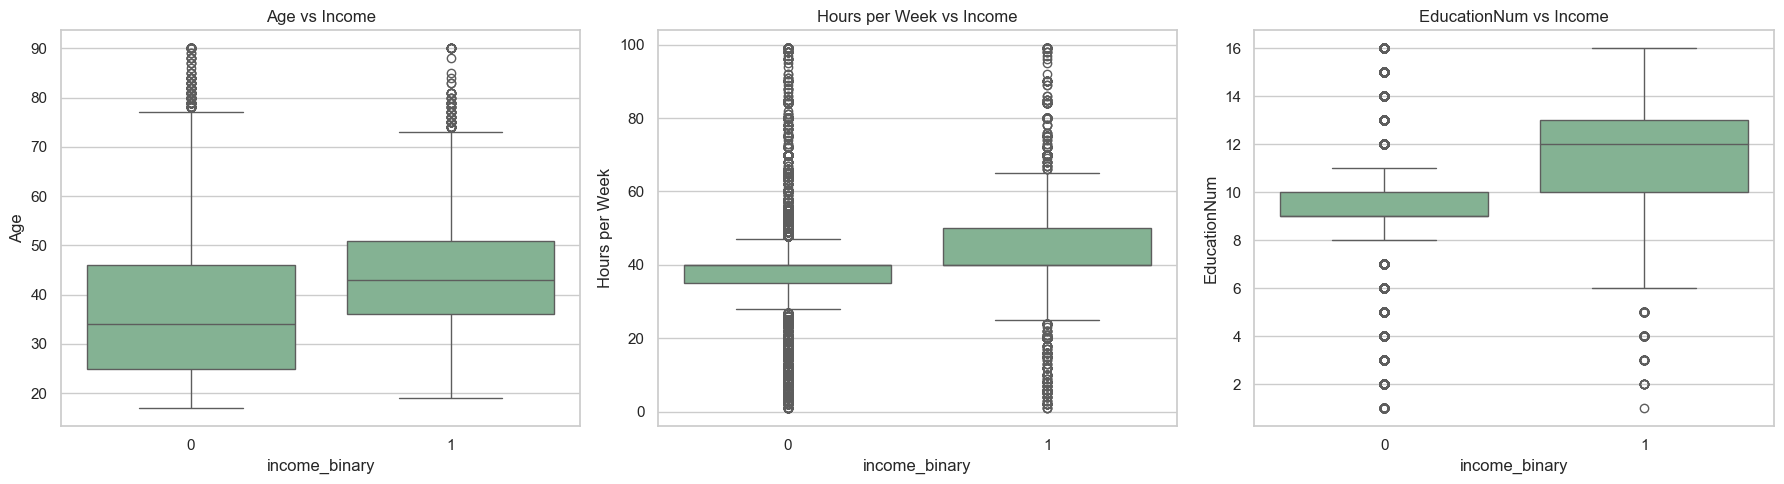

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # Menghapus karakter 'w' tambahan di sini

sns.boxplot(x='income_binary', y='Age', data=df, ax=axes[0])
axes[0].set_title('Age vs Income')

sns.boxplot(x='income_binary', y='Hours per Week', data=df,  ax=axes[1])
axes[1].set_title('Hours per Week vs Income')

sns.boxplot(x='income_binary', y='EducationNum', data=df, ax=axes[2])
axes[2].set_title('EducationNum vs Income')


plt.tight_layout()
plt.show()


---

***Insight Grafik Boxplot (Age, Hours per Week, EducationNum vs Income)***

**Age vs Income**

* Individu dengan **income >50K** memiliki **median usia lebih tinggi** dibandingkan kelompok ≤50K.
* Kelompok ≤50K didominasi usia lebih muda, menunjukkan fase awal atau menengah karier.
* Hal ini mengindikasikan bahwa **pengalaman kerja yang seiring bertambahnya usia** berkontribusi terhadap peningkatan pendapatan.

---

**Hours per Week vs Income**

* Kelompok **income >50K** cenderung bekerja **lebih lama**, dengan median jam kerja sekitar **40–50 jam per minggu**.
* Kelompok ≤50K umumnya bekerja mendekati jam kerja standar (±40 jam/minggu).
* Jam kerja yang lebih panjang berkorelasi positif dengan peluang memperoleh pendapatan yang lebih tinggi.

---
**EducationNum vs Income**

* Perbedaan distribusi **EducationNum** antara kedua kelompok income terlihat paling jelas.
* Individu dengan **income >50K** memiliki tingkat pendidikan yang lebih tinggi (Bachelor ke atas).
* Pendidikan menunjukkan pengaruh paling signifikan terhadap tingkat pendapatan dibandingkan usia dan jam kerja.

---

 **Kesimpulan Utama**

> Individu dengan pendapatan lebih dari 50K cenderung berusia lebih tua, bekerja lebih lama, dan memiliki tingkat pendidikan yang lebih tinggi. Dari ketiga variabel yang dianalisis, **tingkat pendidikan merupakan faktor yang paling dominan dalam membedakan kelompok pendapatan**.

---

In [24]:
# Menggunakan IQR untuk mendapatkan jumlah outliers
hasil = []

for kolom in num_cols:
    q1 = df[kolom].quantile(0.25)
    q3 = df[kolom].quantile(0.75)
    iqr = q3 - q1
    whis = 1.5 * iqr

    upper_bound = q3 + whis
    lower_bound = q1 - whis

    jumlah_outliers = len(df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)])

    hasil.append({
        'Kolom': kolom,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Jumlah_Outliers': jumlah_outliers
    })
df_outliers = pd.DataFrame(hasil)
df_outliers

,Kolom,Q1,Q3,IQR,Lower_Bound,Upper_Bound,Jumlah_Outliers
0,Age,28.0,48.0,20.0,-2.00,78.00,215
1,Final Weight,117553.5,237621.0,120067.5,-62547.75,417722.25,1453
2,EducationNum,9.0,12.0,3.0,4.50,16.50,1789
3,Capital Gain,0.0,0.0,0.0,0.00,0.00,4035
4,capital loss,0.0,0.0,0.0,0.00,0.00,2282
5,Hours per Week,40.0,45.0,5.0,32.50,52.50,13489
6,income_binary,0.0,0.0,0.0,0.00,0.00,11685


1. Age

Outlier terdeteksi pada usia di atas 78 tahun dengan jumlah 215 observasi. Secara statistik nilai ini berada di luar batas IQR, namun secara realistis masih masuk akal karena rentang usia dataset mencapai 90 tahun. Dalam konteks perbankan, usia yang sangat tinggi dapat berkorelasi dengan masa pensiun dan penurunan earning capacity, sehingga relevan sebagai indikator risiko kredit. Oleh karena itu, data tidak dihapus, tetapi tetap dipertahankan untuk dianalisis lebih lanjut.

---

2. Final Weight

Terdapat 1.453 outlier dengan distribusi sangat right-skewed. Namun variabel ini merupakan bobot sensus (sampling weight) dan tidak mencerminkan kondisi finansial individu. Dalam konteks credit risk modeling, variabel ini tidak relevan sehingga lebih tepat untuk dihapus daripada dilakukan penanganan outlier.

---

3. EducationNum

Sebanyak 1.789 observasi terdeteksi sebagai outlier, terutama pada level pendidikan sangat rendah dan sangat tinggi. Namun variabel ini bersifat ordinal diskrit (1-16), sehingga secara konseptual bukan anomali melainkan variasi jenjang pendidikan. Dalam konteks bisnis perbankan, level pendidikan tetap relevan karena berkaitan dengan earning capacity.

---

4. Capital Gain

Mayoritas nilai adalah 0 sehingga Q1 dan Q3 sama-sama 0, menyebabkan seluruh nilai di atas 0 terdeteksi sebagai outlier (4.035 observasi). Ini menunjukkan distribusi sangat zero-inflated dan highly skewed. Namun secara bisnis, capital gain tinggi justru menjadi indikator kepemilikan aset dan potensi kekayaan. Variabel ini sangat informatif untuk menilai kemampuan finansial sehingga tidak dihapus

---

5. Capital Loss

Pola yang sama terjadi pada capital loss dengan 2.282 outlier. Mayoritas individu tidak mengalami kerugian investasi, sedangkan sebagian kecil memiliki nilai cukup besar. Dalam konteks perbankan, nilai ini tetap relevan untuk melihat profil risiko finansial sehingga tidak perlu dihapus.

---

6. Hours per Week

Sebanyak 13.489 observasi terdeteksi sebagai outlier di bawah 32,5 jam dan di atas 52,5 jam per minggu. Secara statistik ini dianggap ekstrem, tetapi secara realistis mencerminkan pekerja part-time maupun lembur. Dalam konteks bisnis, jam kerja rendah dapat mengindikasikan pendapatan rendah, sementara jam kerja tinggi dapat berkorelasi dengan income lebih besar. Oleh karena itu, variabel ini tetap dipertahankan.

---


## **Korelasi Feature**

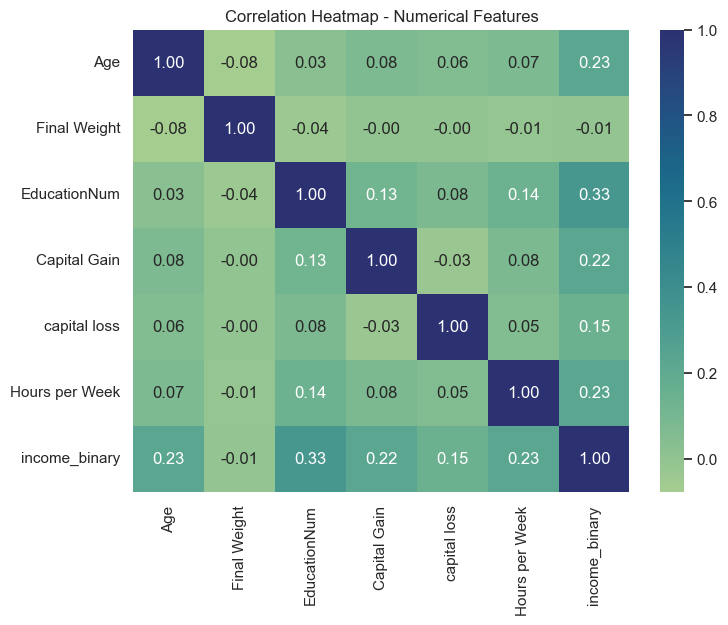

In [25]:
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='crest', fmt='.2f')
plt.title("Correlation Heatmap - Numerical Features")
plt.show()



1. Korelasi Terhadap Target (income_binary)


-  EducationNum → 0.33

Ini korelasi tertinggi.

Artinya:
Semakin tinggi tingkat pendidikan → semakin tinggi probabilitas income >50K.

Secara bisnis:
Masuk akal karena pendidikan berpengaruh pada earning capacity.
Ini fitur numerik paling kuat secara linear.

---

-  Age → 0.23

Korelasi positif moderat.

Artinya:
Usia lebih tinggi cenderung memiliki income lebih tinggi (hingga titik tertentu).

Bisnis:
Semakin senior → pengalaman meningkat → potensi gaji naik.
Namun mungkin non-linear (bisa turun di usia pensiun).

---

- Hours per Week → 0.23

Jam kerja lebih tinggi → income cenderung lebih tinggi.

Bisnis:
Korelasi ini logis, pekerja full-time atau overtime cenderung berpenghasilan lebih besar.

---

- Capital Gain → 0.22

Korelasi cukup kuat.

Bisnis:
Individu dengan capital gain kemungkinan memiliki investasi → wealth indicator.

Ini penting untuk risk assessment.

---

- Capital Loss → 0.15

Korelasi lemah-moderat.

Masih informatif, tapi tidak sekuat education atau age.

---

- Final Weight → -0.01

Hampir nol.

Ini mengonfirmasi:
Final Weight tidak relevan untuk modeling kredit.

Layak di-drop.


---

2. Insight Penting

Semua korelasi relatif rendah (< 0.35).

Artinya:
Income tidak ditentukan oleh satu variabel tunggal.

Ini menunjukkan:

* Pola kemungkinan non-linear
* Kombinasi fitur lebih penting daripada hubungan linear tunggal


---


## **Test Normalitas Data Numerik**

hal ini bertujuan penentuan jenis scaller yang akan digunakan dan untuk data income menjadi penentuan uji lanjutan untuk data kategori vs income

In [26]:
from scipy.stats import normaltest

listPvalue = []
listStatusNormal = []
listKeterangan = []

# Perbaiki nama kolom agar sesuai dengan DataFrame (case-sensitive)
listKolom = ['Age','EducationNum','Capital Gain','capital loss','Hours per Week','income_binary']

for i in listKolom:
    stat, pvalue = normaltest(df[i])

    if pvalue <= 0.05:
        status = 'Distribusi Tidak Normal'
        keterangan = 'Data tidak berdistribusi normal'
    else:
        status = 'Distribusi Normal'
        keterangan = 'Data mendekati distribusi normal.'

    listPvalue.append(pvalue)
    listStatusNormal.append(status)
    listKeterangan.append(keterangan)

Normalitas = pd.DataFrame({
    'Column Name': listKolom,
    'P-Value': listPvalue,
    'Status Normalitas': listStatusNormal,
    'Penjelasan': listKeterangan
})

Normalitas

,Column Name,P-Value,Status Normalitas,Penjelasan
0,Age,0.000000e+00,Distribusi Tidak Normal,Data tidak berdistribusi normal
1,EducationNum,6.102899e-270,Distribusi Tidak Normal,Data tidak berdistribusi normal
2,Capital Gain,0.000000e+00,Distribusi Tidak Normal,Data tidak berdistribusi normal
3,capital loss,0.000000e+00,Distribusi Tidak Normal,Data tidak berdistribusi normal
4,Hours per Week,0.000000e+00,Distribusi Tidak Normal,Data tidak berdistribusi normal
5,income_binary,0.000000e+00,Distribusi Tidak Normal,Data tidak berdistribusi normal


## **Distribusi Data Kategori**

In [27]:
df.describe(include=['object'])

,Workclass,Education,Marital Status,Occupation,Relationship,Race,Gender,Native Country
count,48812,48812,48812,48812,48812,48812,48812,48812
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33878,15777,22372,6167,19709,41736,32630,43809


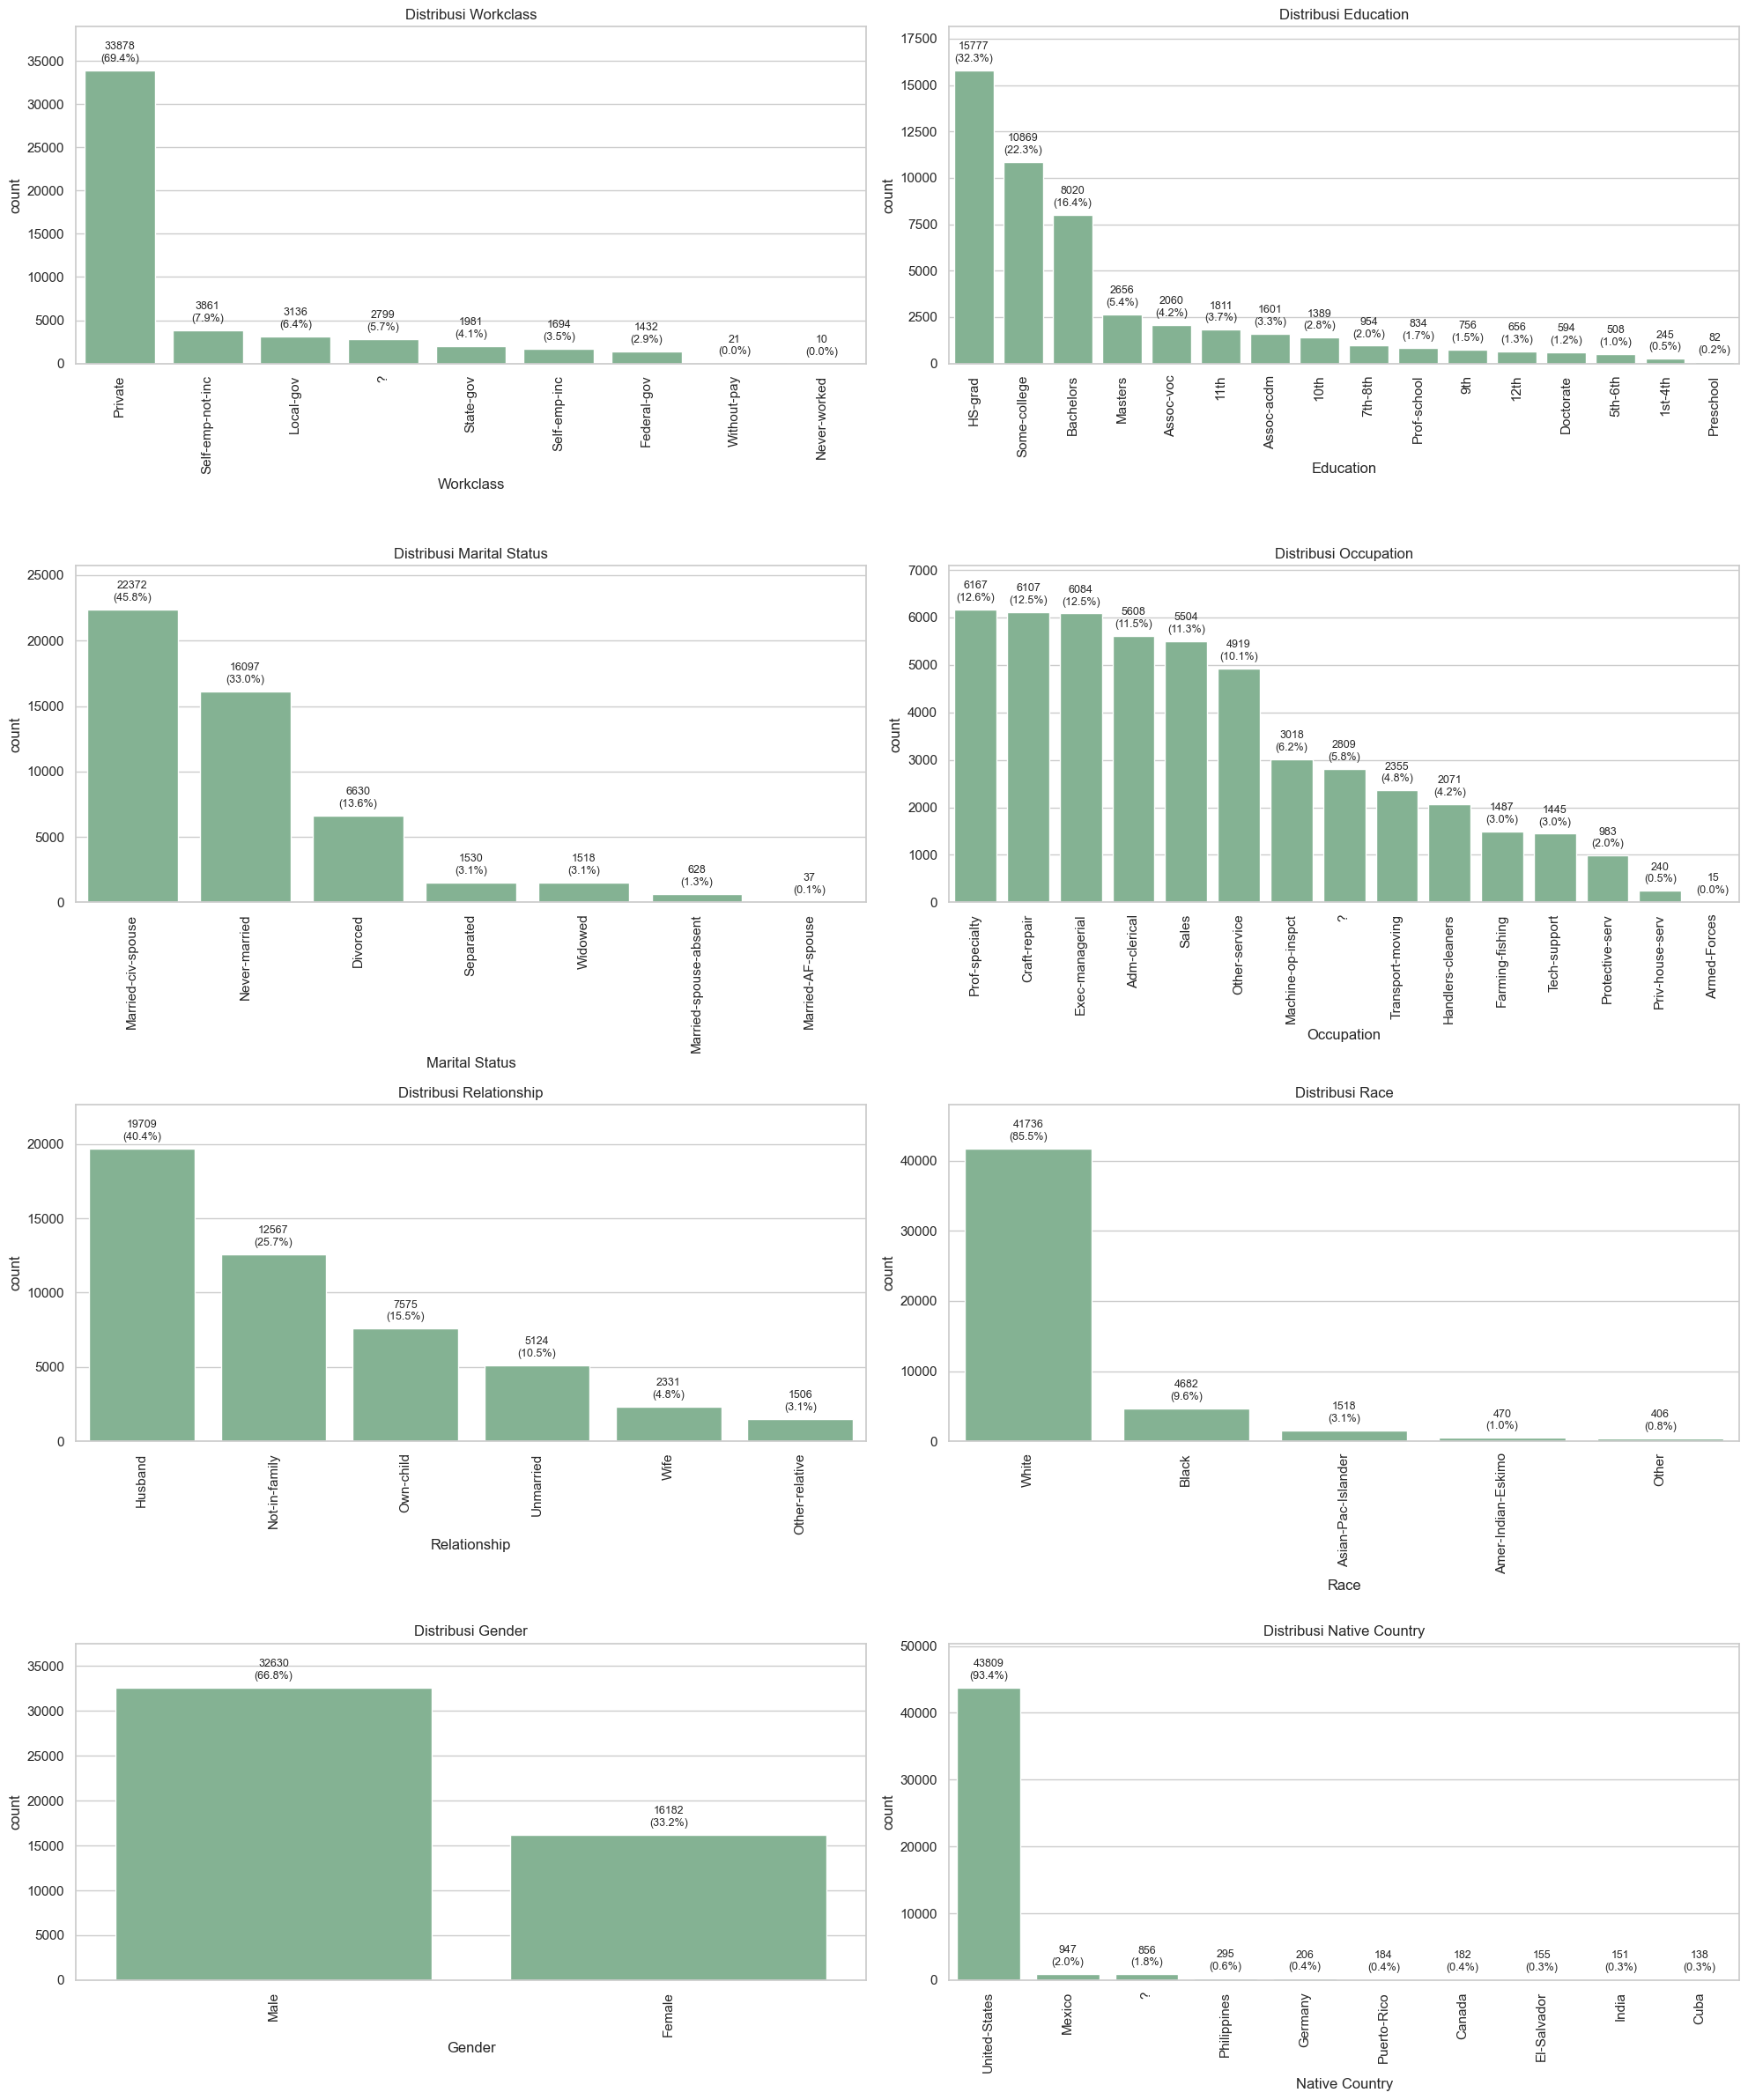

In [28]:
cat_cols = df.select_dtypes(include='object').columns

n_cols = 2
n_rows = int(np.ceil(len(cat_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]

    if col == 'Native Country':
        top10 = df[col].value_counts().head(10).index
        data_plot = df[df[col].isin(top10)]
        order = top10
    else:
        data_plot = df
        order = df[col].value_counts().index


    sns.countplot(data=data_plot, x=col, order=order, ax=ax)

    # Tambahkan margin atas supaya angka tidak nempel
    max_height = max([p.get_height() for p in ax.patches])
    ax.set_ylim(0, max_height * 1.15)

    # Hitung total hanya sekali untuk setiap kolom
    total = len(data_plot)

    # Tambahkan angka dan persentase
    for p in ax.patches:
        height = p.get_height()
        percentage = 100 * height / total

        ax.annotate(f'{int(height)}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom',
                    xytext=(0, 5),
                    textcoords='offset points',
                    fontsize=9)

    ax.set_title(f'Distribusi {col}')
    ax.tick_params(axis='x', rotation=90)

# Hapus subplot kosong
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. Workclass

Mayoritas individu berasal dari sektor **Private**, dengan jumlah yang sangat dominan dibanding kategori lain. Sektor pemerintah (Federal, State, Local) serta Self-employed memiliki proporsi yang jauh lebih kecil, sementara kategori seperti Without-pay dan Never-worked hampir tidak signifikan.

- Insight Data:

    * Distribusi sangat terkonsentrasi pada pekerja sektor swasta.
    * Terdapat kategori “?” yang menunjukkan missing value terselubung.
    * Ketimpangan distribusi menunjukkan potensi bias model jika tidak ditangani dengan benar.

- Insight Bisnis:

    * Segmen private employee akan menjadi basis utama underwriting.
    * Self-employed meskipun jumlahnya lebih kecil, memiliki profil risiko berbeda (income fluktuatif, cashflow tidak stabil).
    * Kategori missing harus ditangani karena dalam praktik kredit, status pekerjaan sangat krusial untuk analisis kemampuan bayar.
    * Variabel ini kemungkinan memiliki kontribusi signifikan terhadap prediksi income >50K.

---

2. Education

Distribusi pendidikan didominasi oleh HS-grad, Some-college, dan Bachelors. Tingkat pendidikan sangat rendah seperti Preschool hingga elementary memiliki proporsi sangat kecil.

- Insight Data:

    * Distribusi sangat tidak merata (long tail pada pendidikan rendah).
    * Banyak kategori granular yang bisa menyebabkan sparsity saat encoding.
    * Education dan EducationNum memiliki informasi yang sama (redundan).

- Insight Bisnis:

    * Pendidikan merupakan proxy kuat terhadap earning capacity.
    * Individu dengan Bachelors, Masters, Doctorate kemungkinan memiliki probabilitas income >50K lebih tinggi.
    * Regrouping pendidikan menjadi level yang lebih umum (SMA, Sarjana, Pascasarjana, dll.) akan:

        * Mengurangi kompleksitas model
        * Menghindari dummy variable yang terlalu banyak
        * Meningkatkan stabilitas model

---

3. Marital Status

Kategori Married-civ-spouse dan Never-married mendominasi dataset.

- Insight Data:

    * Status menikah memiliki distribusi besar dan relatif stabil.
    * Kategori Married-AF-spouse sangat kecil → bisa digabung.
    * Potensi overlap dengan variabel Relationship.

- Insight Bisnis:

    * Individu menikah sering memiliki income household lebih stabil.
    * Married-civ-spouse berpotensi berkorelasi positif dengan income >50K.
    * Status menikah sering menjadi indikator stabilitas sosial-ekonomi.

---

4. Occupation

Distribusi relatif tersebar, dengan beberapa kategori dominan seperti:

* Prof-specialty
* Exec-managerial
* Craft-repair
* Adm-clerical

Terdapat kategori “?” yang menunjukkan missing.

- Insight Data:

    * Occupation sangat granular (15 kategori).
    * Beberapa kategori memiliki frekuensi sangat kecil.
    * Potensi strong predictor terhadap income.

- Insight Bisnis:

    * Prof-specialty dan Exec-managerial kemungkinan memiliki income >50K lebih tinggi.
    * Machine-op-inspct, Handlers-cleaners kemungkinan lebih sering ≤50K.
    * Variabel ini kemungkinan menjadi feature penting dalam model klasifikasi.
    * Missing value pada occupation harus ditangani karena bisa mempengaruhi prediksi risiko.

---

5. Relationship

Dominan pada kategori Husband dan Not-in-family.

- Insight Data:

    * Distribusi tidak seimbang.
    * Overlap logis dengan Marital Status (misalnya Husband → Married).

- Insight Bisnis:

    * Husband kemungkinan berkorelasi dengan income >50K.
    * Variabel ini bisa menangkap posisi individu dalam household.
    * Perlu diuji korelasinya dengan marital status untuk menghindari redundancy dalam model linear.

---

6. Race

Distribusi sangat tidak seimbang, didominasi oleh White.

- Insight Data:

    * Highly imbalanced feature.

---

7. Gender

Male jauh lebih dominan dibanding Female.

- Insight Data:

    * Distribusi tidak seimbang.
    * Potensi income gap tercermin dalam target.


---

8. Native Country

Didominasi sangat besar oleh United States (>90%).

- Insight Data:

    * Highly sparse untuk negara selain US.
    * Encoding tanpa regrouping akan menghasilkan banyak dummy dengan frekuensi kecil.
    * Tidak informatif dalam bentuk granular.

- Insight Bisnis:

    * Untuk modeling income di konteks ini, country granular tidak terlalu relevan.
    * Lebih rasional digabung menjadi:

        * US
        * Non-US
    * Mengurangi risiko overfitting dan noise.

---




## **Numerikal Distribusi**

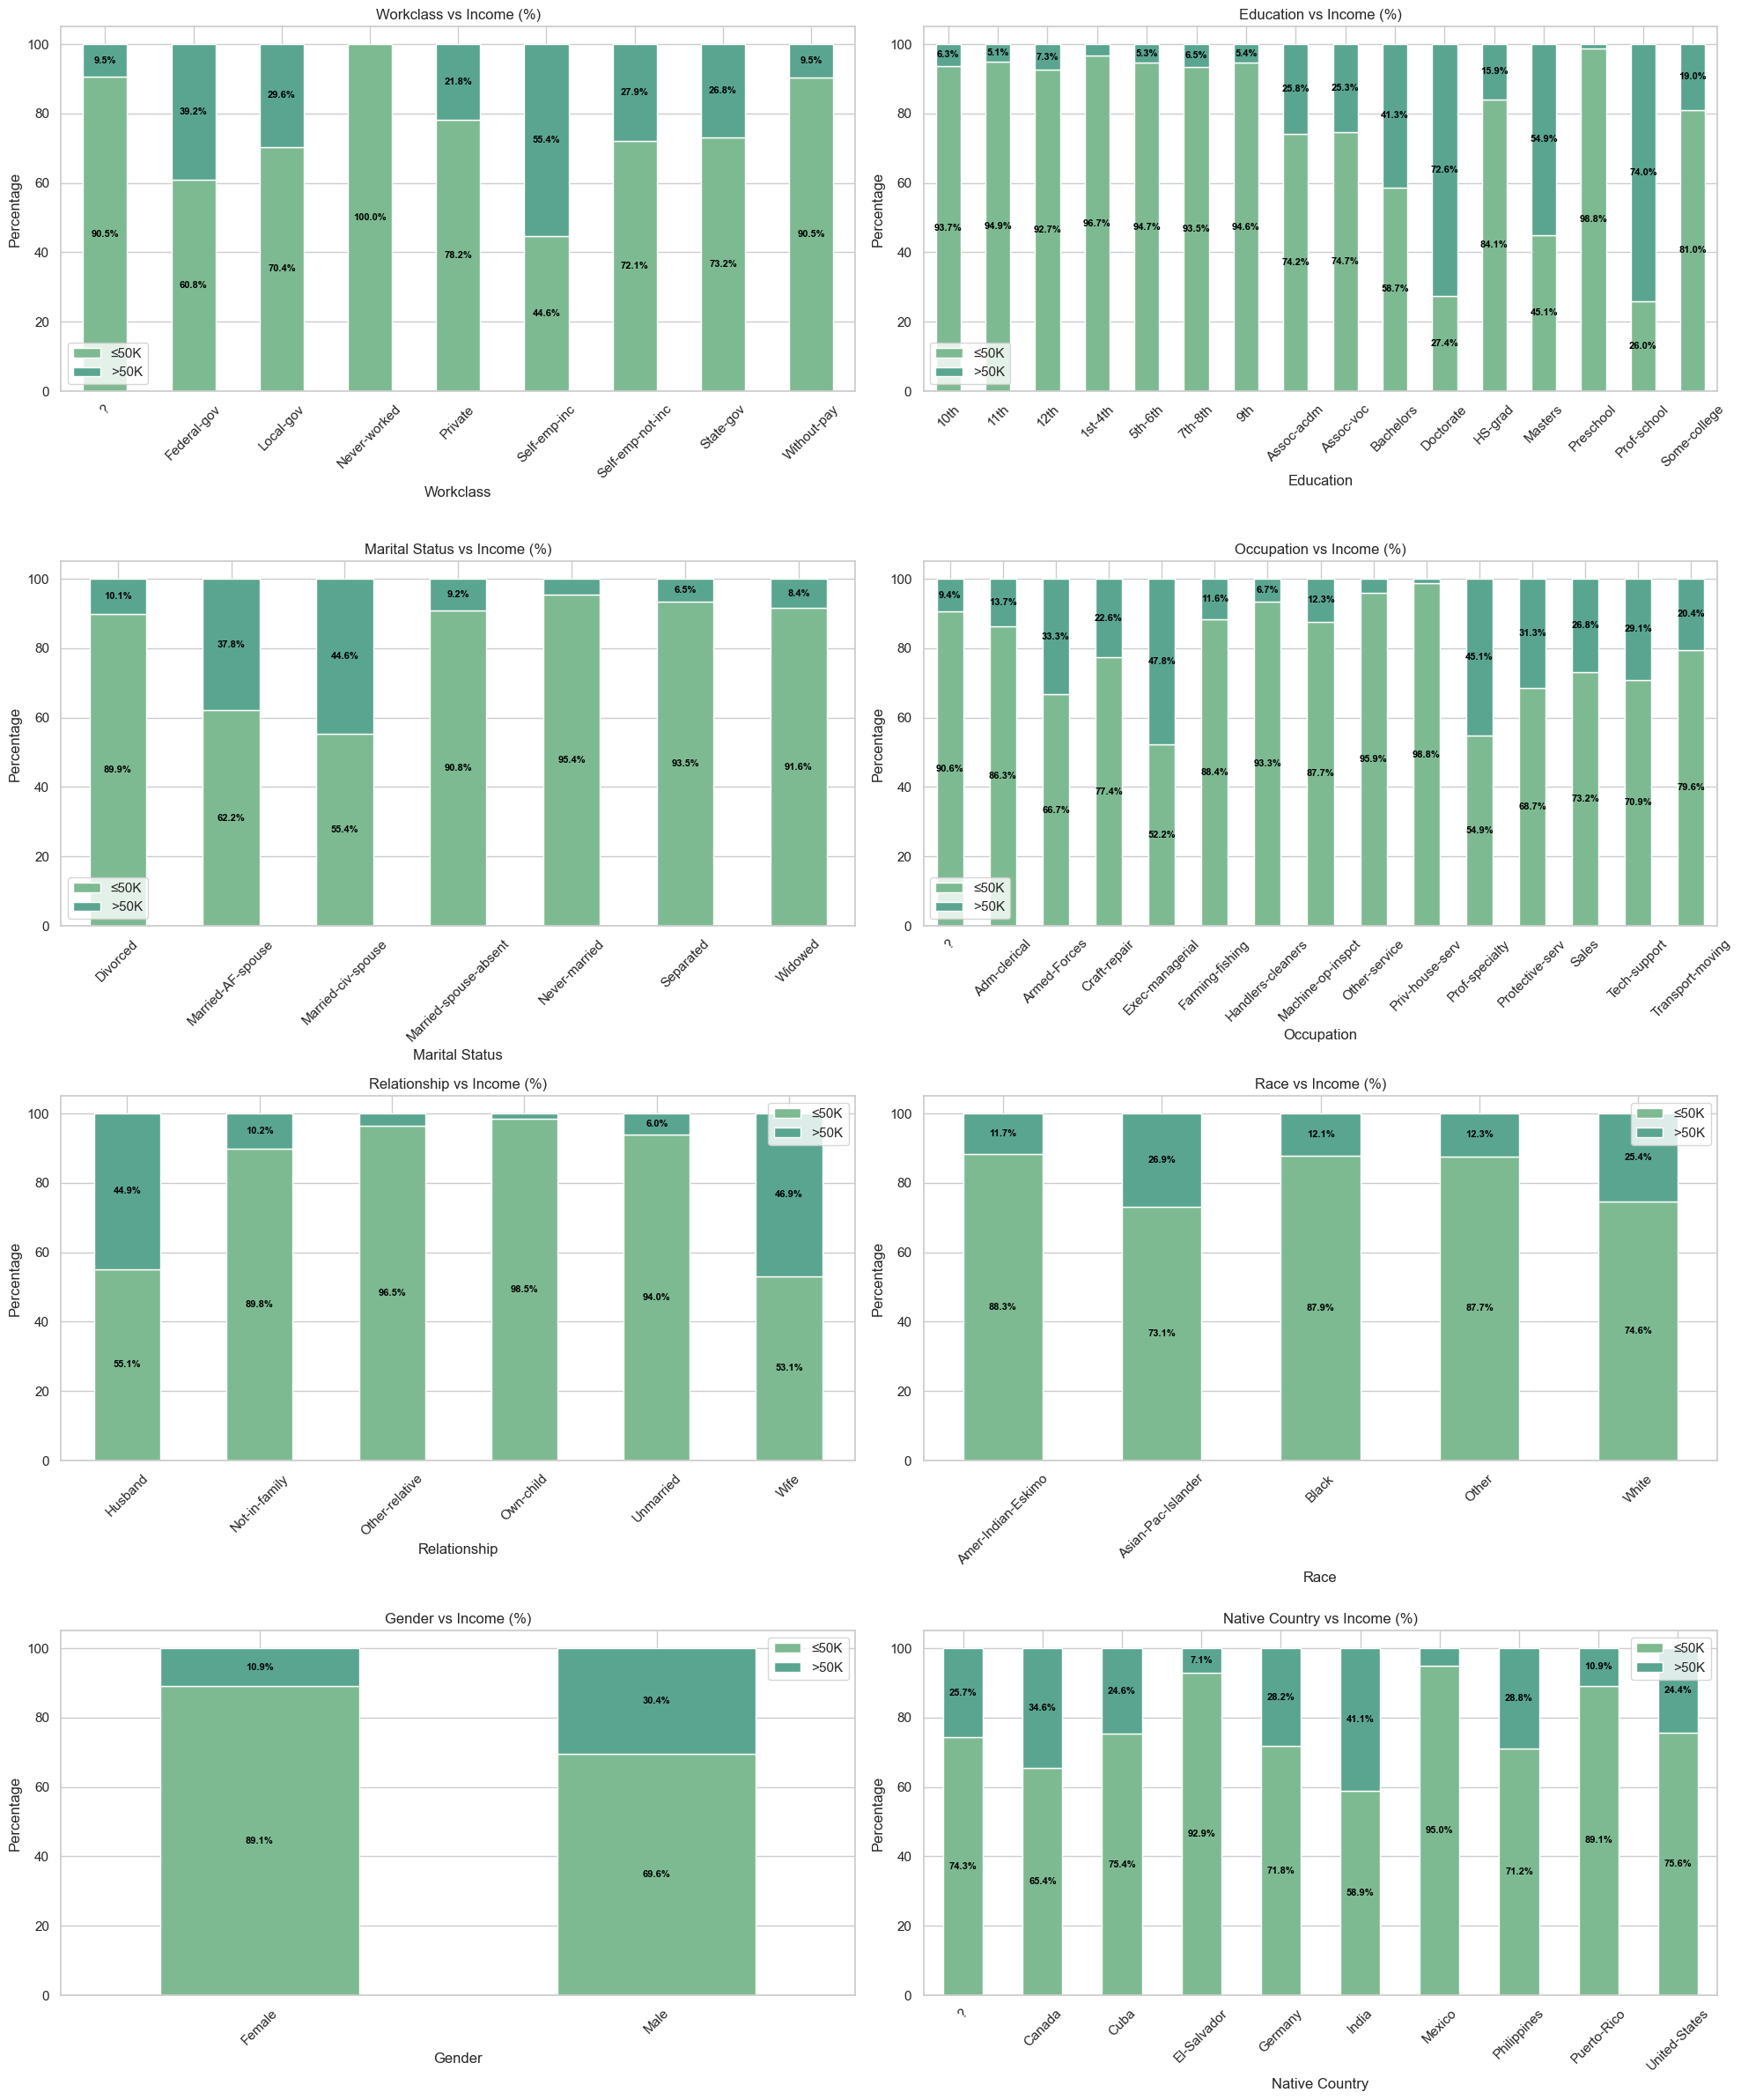

In [29]:
cat_cols = df.select_dtypes(include='object').columns

n_cols = 2
n_rows = int(np.ceil(len(cat_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]

    # ===== Native Country → Top 10 =====
    if col == 'Native Country':
        top10 = df[col].value_counts().head(10).index
        data_plot = df[df[col].isin(top10)]
    else:
        data_plot = df

    # Crosstab percentage
    crosstab = pd.crosstab(data_plot[col],
                           data_plot['income_binary'],
                           normalize='index') * 100

    crosstab = crosstab.sort_index()

    bars = crosstab.plot(kind='bar',
                         stacked=True,
                         ax=ax)

    ax.set_title(f'{col} vs Income (%)')
    ax.set_ylabel('Percentage')
    ax.legend(['≤50K', '>50K'])
    ax.tick_params(axis='x', rotation=45)

    # ===== Tambahkan persentase di dalam bar =====
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 5:  # supaya tidak terlalu kecil dan bertabrakan
                ax.text(bar.get_x() + bar.get_width()/2,
        bar.get_y() + height/2,
        f'{height:.1f}%',
        ha='center',
        va='center',
        fontsize=8,
        color='black',
        fontweight='bold')


# Hapus subplot kosong
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Analisis Hubungan Variabel Kategorikal terhadap Income**

Berdasarkan visualisasi distribusi proporsi income ≤50K dan >50K pada masing-masing variabel kategorikal, diperoleh beberapa temuan penting sebagai berikut:

---

1. Workclass

* Kelompok **Self-emp-inc** menunjukkan proporsi income >50K tertinggi dibandingkan kategori lainnya, mengindikasikan bahwa individu dengan usaha berbadan hukum cenderung memiliki pendapatan lebih tinggi.
* Pekerja sektor **Federal-gov dan State-gov** memiliki proporsi income >50K yang relatif lebih baik dibanding sektor Private.
* Mayoritas pekerja **Private** masih berada pada kategori ≤50K, menunjukkan heterogenitas dalam segmen ini.
* Kategori **Never-worked dan Without-pay** hampir seluruhnya berada pada income ≤50K, sehingga berpotensi menjadi segmen dengan risiko finansial tinggi.

Secara keseluruhan, variabel Workclass cukup informatif untuk mengidentifikasi indikasi awal kemampuan bayar.

---

2. Education

* Terdapat peningkatan proporsi income >50K seiring dengan kenaikan tingkat pendidikan.
* Individu dengan pendidikan **Doctorate, Prof-school, dan Masters** memiliki probabilitas income >50K yang signifikan.
* Pendidikan hingga tingkat **HS-grad atau lebih rendah** didominasi oleh income ≤50K.

Hal ini menunjukkan bahwa pendidikan merupakan salah satu variabel dengan daya diskriminasi paling kuat dalam memprediksi kategori pendapatan.

---
3. Marital Status

* Individu dengan status **Married-civ-spouse** memiliki proporsi income >50K yang jauh lebih tinggi dibandingkan status lainnya.
* Kelompok **Never-married, Divorced, dan Widowed** didominasi oleh income ≤50K.

Status pernikahan menunjukkan korelasi dengan stabilitas ekonomi dan potensi pendapatan, sehingga relevan dalam konteks analisis risiko kredit.

---

4. Occupation

* Pekerjaan seperti **Exec-managerial dan Prof-specialty** memiliki proporsi income >50K tertinggi.
* Occupation berbasis profesional dan manajerial menunjukkan kecenderungan pendapatan yang lebih tinggi.
* Sebaliknya, pekerjaan seperti **Handlers-cleaners, Farming-fishing, Machine-op-inspct, dan Other-service** didominasi oleh income ≤50K.

Occupation merupakan variabel yang sangat kuat dalam membedakan kelompok high income dan low income.

---

5. Relationship

* Kategori **Husband dan Wife** menunjukkan proporsi income >50K yang lebih tinggi dibanding kategori lain.
* **Own-child dan Other-relative** hampir seluruhnya berada pada income ≤50K.

Variabel ini memberikan informasi tambahan mengenai posisi ekonomi dalam struktur rumah tangga, meskipun perlu diuji potensi overlap dengan Marital Status.

---
6. Race

* Terdapat variasi proporsi income >50K antar kategori ras.
* Kelompok **Asian-Pac-Islander** menunjukkan proporsi income >50K yang relatif lebih tinggi dibanding beberapa kategori lainnya.
* Kelompok **White** memiliki jumlah absolut terbesar pada income >50K, namun hal ini juga dipengaruhi oleh dominasi jumlah sampel.
* Beberapa kategori seperti **Amer-Indian-Eskimo** dan **Other** didominasi oleh income ≤50K.

---

7. Gender

* Terdapat perbedaan proporsi income >50K yang cukup signifikan antara Male dan Female.
* Variabel ini menunjukkan daya diskriminasi, namun juga termasuk variabel sensitif.

Pertimbangan etis dan regulasi perlu diperhatikan sebelum memasukkannya dalam model prediksi kredit.

---

8. Native Country

* Beberapa negara seperti India dan Germany menunjukkan proporsi income >50K yang relatif lebih tinggi.
* Namun distribusi kategori sangat tidak merata (sparse), dengan dominasi kuat United States.
* Granularitas kategori yang tinggi dapat menyebabkan ketidakstabilan model.

Disarankan untuk melakukan regrouping, misalnya menjadi **US dan Non-US**, guna meningkatkan stabilitas modeling.

---


## **Hubungan Data Kategori Vs Income**

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

cat_cols = df.select_dtypes(include='object').columns.tolist()

results = []

for col in cat_cols:

    temp_df = df[[col, 'income_binary']].dropna()
    contingency_table = pd.crosstab(temp_df[col], temp_df['income_binary'])

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Hitung Cramer's V
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim))

    results.append({
        'Feature': col,
        'Chi2_stat': round(chi2, 4),
        'p_value': p_value,
        'Degree_of_Freedom': dof,
        'Cramers_V': round(cramers_v, 4)
    })

chi_square_df = pd.DataFrame(results)

# Interpretasi Chi-Square (Signifikansi)
def interpret_chi(p):
    if p < 0.05:
        return "Terdapat hubungan signifikan dengan Income"
    else:
        return "Tidak terdapat hubungan signifikan dengan Income"

chi_square_df['Interpretasi_ChiSquare'] = chi_square_df['p_value'].apply(interpret_chi)

# Interpretasi Effect Size
def interpret_effect(v):
    if v < 0.10:
        return "Sangat Lemah"
    elif v < 0.30:
        return "Lemah"
    elif v < 0.50:
        return "Sedang"
    else:
        return "Kuat"

chi_square_df['Kekuatan_Hubungan'] = chi_square_df['Cramers_V'].apply(interpret_effect)

# Rapikan p-value
chi_square_df['p_value'] = chi_square_df['p_value'].apply(lambda x: format(x, '.3g'))

# Urutkan berdasarkan kekuatan hubungan
chi_square_df = chi_square_df.sort_values(by='Cramers_V', ascending=False).reset_index(drop=True)

chi_square_df


,Feature,Chi2_stat,p_value,Degree_of_Freedom,Cramers_V,Interpretasi_ChiSquare,Kekuatan_Hubungan
0,Relationship,10080.2928,0,5,0.4544,Terdapat hubungan signifikan dengan Income,Sedang
1,Marital Status,9807.1009,0,6,0.4482,Terdapat hubungan signifikan dengan Income,Sedang
2,Education,6537.5136,0,15,0.3660,Terdapat hubungan signifikan dengan Income,Sedang
3,Occupation,5981.7563,0,14,0.3501,Terdapat hubungan signifikan dengan Income,Sedang
4,Gender,2248.1053,0,1,0.2146,Terdapat hubungan signifikan dengan Income,Lemah
5,Workclass,1610.7090,0,8,0.1817,Terdapat hubungan signifikan dengan Income,Lemah
6,Race,486.9721,4.4e-104,4,0.0999,Terdapat hubungan signifikan dengan Income,Sangat Lemah
7,Native Country,450.5019,2.28e-70,41,0.0961,Terdapat hubungan signifikan dengan Income,Sangat Lemah


**Hubungan Variabel Kategorikal terhadap Income**

1. Signifikansi Statistik

Berdasarkan hasil uji Chi-Square, seluruh variabel kategorikal menunjukkan p-value < 0.05. Hal ini mengindikasikan bahwa secara statistik terdapat hubungan antara setiap variabel dengan kategori Income (≤50K dan >50K).

Namun, mengingat ukuran dataset yang besar, signifikansi statistik saja tidak cukup untuk menilai kekuatan hubungan. Oleh karena itu, digunakan Cramer's V untuk mengukur besarnya asosiasi (effect size) masing-masing variabel terhadap Income.

---

2. Variabel dengan Kekuatan Hubungan Sedang

**Relationship (Cramer's V = 0.4544)**
Merupakan variabel dengan asosiasi paling kuat terhadap Income. Struktur hubungan dalam rumah tangga (misalnya Husband, Wife, Not-in-family, dan lainnya) menunjukkan perbedaan distribusi income yang cukup signifikan antar kategori.

**Marital Status (Cramer's V = 0.4482)**
Status pernikahan memiliki hubungan yang kuat dengan kategori pendapatan. Individu yang menikah cenderung memiliki probabilitas lebih tinggi berada pada kategori income >50K dibandingkan kategori lainnya.

**Education (Cramer's V = 0.3660)**
Tingkat pendidikan menunjukkan hubungan yang cukup kuat terhadap Income. Semakin tinggi tingkat pendidikan, semakin besar kemungkinan individu berada pada kategori income >50K.

**Occupation (Cramer's V = 0.3501)**
Jenis pekerjaan juga memiliki asosiasi yang cukup kuat. Profesi tertentu, seperti managerial dan professional, memiliki kecenderungan lebih besar berada pada kelompok pendapatan tinggi.

Keempat variabel ini dapat dikategorikan sebagai faktor sosial-ekonomi utama yang memiliki pengaruh paling relevan terhadap kategori Income.

---

3. Variabel dengan Kekuatan Hubungan Lemah

**Gender (Cramer's V = 0.2146)**
Terdapat hubungan signifikan antara Gender dan Income, namun kekuatan asosiasinya tergolong lemah dibandingkan variabel sosial-ekonomi.

**Workclass (Cramer's V = 0.1817)**
Jenis sektor pekerjaan memiliki hubungan yang signifikan namun relatif lebih kecil dibandingkan Occupation.

---

4. Variabel dengan Kekuatan Hubungan Sangat Lemah

**Race (Cramer's V = 0.0999)**
**Native Country (Cramer's V = 0.0961)**

Kedua variabel ini tetap menunjukkan hubungan signifikan secara statistik, namun kekuatan asosiasinya sangat lemah. Hal ini mengindikasikan bahwa meskipun terdapat perbedaan distribusi Income antar kategori, kontribusinya terhadap variasi Income relatif kecil dibandingkan variabel lain.

---

**Kesimpulan**

1. Seluruh variabel kategorikal memiliki hubungan signifikan terhadap Income secara statistik.
2. Variabel sosial-ekonomi seperti Relationship, Marital Status, Education, dan Occupation memiliki pengaruh paling besar terhadap kategori Income.
3. Variabel demografis seperti Race dan Native Country memiliki pengaruh yang relatif kecil berdasarkan ukuran effect size.
4. Dalam konteks modeling, variabel dengan Cramer's V kategori sedang berpotensi menjadi prediktor utama dalam model klasifikasi Income.



## **Anomali**

### Mengubah "?" dengan NaN

Tanda "?" harus diubah menjadi NaN karena secara konsep "?" bukan nilai kategori yang valid, melainkan representasi dari missing value.

In [31]:
import numpy as np

# Cek apakah ada kolom yang mengandung string '?' (dengan atau tanpa spasi di awal/akhir)
problem_cols = ['Workclass', 'Occupation', 'Native Country', 'Age','Final Weight','EducationNum','Relationship','Race','Gender','Capital Gain','capital loss','Hours per Week']

rows_with_question_mark = df[df[problem_cols].apply(lambda x: x.astype(str).str.contains('\?| \?')).any(axis=1)]

if not rows_with_question_mark.empty:
    print(f"Ditemukan {len(rows_with_question_mark)} baris yang mengandung '?':")
    display(rows_with_question_mark.head(20))
else:
    print("Tidak ditemukan baris yang mengandung '?'")



Ditemukan 3619 baris yang mengandung '?':


,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,income_binary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,1
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,1
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,0
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,0
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,0
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,0
128,35,?,129305,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,0


In [32]:
#Mengubah "?" dengan NaN
df.replace(" ?", np.nan, inplace=True)
df.replace("?", np.nan, inplace=True)

### Melihat jumlah NaN

In [33]:
#Melihat jumlah NaN pada masing-masing kolom
df.isna().sum()

Age                  0
Workclass         2799
Final Weight         0
Education            0
EducationNum         0
Marital Status       0
Occupation        2809
Relationship         0
Race                 0
Gender               0
Capital Gain         0
capital loss         0
Hours per Week       0
Native Country     856
income_binary        0
dtype: int64

### Nan pada Occupation dan Workclass

Workclass menjawab pertanyaan “bekerja dalam sistem atau sektor apa”, sedangkan Occupation menjawab “bekerja sebagai apa”. hal ini bisa kita pertanyakan Nan pada Occupation dia bekerja di sektor apa

In [34]:
# Melihat NaN pada kolom Occupation dan tidak NaN pada kolom Workclass
filtered_df = df[df['Occupation'].isna() & ~df['Workclass'].isna()]
display(filtered_df)
print(f"Jumlah baris di mana 'Occupation' NaN tapi 'Workclass' tidak NaN: {len(filtered_df)}")

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,income_binary
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,0
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,0
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,0
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,0
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,0
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,0
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,0
8784,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,0
11606,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,0
13897,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,0


Jumlah baris di mana 'Occupation' NaN tapi 'Workclass' tidak NaN: 10


Selanjutnya kita coba lihat berapa jumlah never worked di Workclass

In [35]:
df['Workclass'].value_counts()

Workclass
Private             33878
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Hal ini logis NaN pada Occupation tidak memiliki pekerjaan, agar menjaga makna data maka NaN pada Occupation yang tidak memiliki pekerjaan maka diganti dengan No-Occupation sehingga jumlah Nan pada kolom Occupation dan Workclass sama-sama 2799

In [36]:
nan_workclass_and_occupation = df[df['Workclass'].isna() & df['Occupation'].isna()]
proporsi = len(nan_workclass_and_occupation) / len(df) * 100
print(f"Proporsi NaN di Workclass dan Occupation: {proporsi:.2f}%")


Proporsi NaN di Workclass dan Occupation: 5.73%


Karena Workclass dan Occupation sama-sama kosong (NaN) dan proporsinya cukup besar sekitar 5%, maka diisi "Unknown" karena tidak ada dasar yang valid untuk menentukan kategorinya.


### Nan pada Native Country

In [37]:
#Melihat berapa Proporsi masing-masing kategori Native Country
df['Native Country'].value_counts(normalize=True) * 100

Native Country
United-States                 91.352490
Mexico                         1.974727
Philippines                    0.615147
Germany                        0.429560
Puerto-Rico                    0.383685
Canada                         0.379515
El-Salvador                    0.323213
India                          0.314872
Cuba                           0.287764
England                        0.264826
China                          0.254400
South                          0.239803
Jamaica                        0.221036
Italy                          0.218951
Dominican-Republic             0.214780
Japan                          0.191843
Poland                         0.181416
Guatemala                      0.179331
Vietnam                        0.179331
Columbia                       0.177246
Haiti                          0.156393
Portugal                       0.139711
Taiwan                         0.135541
Iran                           0.123029
Greece                   

Mengingat 91% observasi berasal dari United-States dan kekuatan asosiasi Native Country terhadap Income tergolong sangat lemah, dilakukan simplifikasi kategori menjadi United-States dan Non-US guna meningkatkan stabilitas model dan mengurangi kompleksitas tanpa kehilangan informasi substantif.

### Inkonsistensi Gender dan Relationship

In [38]:
# Mencari inkonsistensi:
# 1. Relationship = Husband, Gender = Female
# 2. Relationship = Wife, Gender = Male

inconsistent_gender_relationship = df[
    (df['Relationship'] == 'Husband') & (df['Gender'] == 'Female') |
    (df['Relationship'] == 'Wife') & (df['Gender'] == 'Male')
]

print(f"Ditemukan {len(inconsistent_gender_relationship)} baris data dengan inkonsistensi Gender dan Relationship.")
display(inconsistent_gender_relationship)

Ditemukan 4 baris data dengan inkonsistensi Gender dan Relationship.


,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,income_binary
575,29,Private,350162,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Male,0,0,40,United-States,1
7109,34,Private,175878,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Female,0,0,40,United-States,0
27141,36,Private,74791,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Male,0,0,60,NaN,0
5660,64,Local-gov,152172,10th,6,Married-civ-spouse,Machine-op-inspct,Wife,White,Male,0,0,40,NaN,0


Mengingat tidak terdapat referensi untuk menentukan kolom mana yang mengalami kesalahan input, dan jumlah observasi sangat kecil (< 0.01%), maka baris dengan inkonsistensi dihapus untuk menjaga integritas data tanpa menambahkan asumsi korektif yang tidak terverifikasi.

### Inkonsistensi Marital Status dan Relationship

In [39]:
# Mencari inkonsistensi antara Marital Status dan Relationship
# Definisi inkonsistensi:
# 1. Marital Status adalah 'Never-married' tetapi Relationship adalah 'Husband' atau 'Wife'
# 2. Marital Status adalah 'Divorced', 'Separated', atau 'Widowed' tetapi Relationship adalah 'Husband' atau 'Wife'

inconsistent_marital_relationship = df[
    (df['Marital Status'] == 'Never-married') & ((df['Relationship'] == 'Husband') | (df['Relationship'] == 'Wife')) |
    ((df['Marital Status'] == 'Divorced') | (df['Marital Status'] == 'Separated') | (df['Marital Status'] == 'Widowed')) & ((df['Relationship'] == 'Husband') | (df['Relationship'] == 'Wife'))
]

print(f"Ditemukan {len(inconsistent_marital_relationship)} baris data dengan inkonsistensi Marital Status dan Relationship.")
display(inconsistent_marital_relationship)

Ditemukan 0 baris data dengan inkonsistensi Marital Status dan Relationship.


,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,income_binary


**Tabel Strategi Data Cleaning**

| Permasalahan                                                                       | Perbaikan                                                                                     | Alasan                                                                                                                                  |
| ---------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Nilai NaN pada `Occupation` ketika `Workclass = Never-worked`                      | Mengganti dengan kategori **"No Occupation"**                                                 | Secara logis individu yang tidak pernah bekerja memang tidak memiliki pekerjaan. Ini bukan missing murni, melainkan kondisi struktural. |
| Nilai NaN simultan pada `Workclass` dan `Occupation`                               | Mengganti dengan kategori **"Unknown"**                                                       | Tidak tersedia informasi untuk inferensi. Menggunakan kategori khusus lebih aman dibanding imputasi spekulatif.                         |
| Distribusi `Native Country` sangat tidak seimbang (±91% United-States)             | Recategorisasi menjadi **United-States** dan **Non-United-States**                            | Mengurangi sparsity, menurunkan dimensionalitas encoding, dan mencegah overfitting akibat kategori minoritas sangat kecil.              |
| Inkonsistensi antara `Relationship` dan `Gender` (misal Wife–Male, Husband–Female) | Menghapus baris inkonsisten                                                                   | Tidak ada ground truth untuk menentukan kolom mana yang salah, sehingga penghapusan lebih metodologis dibanding koreksi asumtif.        |
| Distribusi `Capital Gain` dan `Capital Loss` sangat skewed dan didominasi nilai 0  | Melakukan **binning** (0 vs >0)                                               | Mengurangi efek outlier ekstrem, menstabilkan model, serta meningkatkan interpretabilitas fitur finansial.                              |
| Kategori `Education` terlalu banyak (16 kategori)                                  | Recategorisasi menjadi tingkat pendidikan utama (Preschool/SD/SMP/SMA/Bachelor/Master/Doktor) | Mengurangi sparse category, meningkatkan interpretabilitas bisnis, dan menyederhanakan model.                                           |
| `EducationNum` redundan dengan `Education`                                         | Menghapus kolom `EducationNum`                                                                | Tidak menambah informasi baru dan berpotensi menimbulkan multicollinearity jika digunakan bersamaan.                                    |
|Kolom `Final Weight`untuk estimasi populasi jadi tidak relevan dengan klasifikasi income| menghapus kolom `Final Weight`|Merupakan sampling weight sensus, bukan karakteristik individu, sehingga tidak relevan untuk modeling income



# **Data Cleaning**

## NaN pada Occupation saat Workclass = Never-worked → "No Occupation"

In [40]:
df.loc[
    (df['Workclass'] == 'Never-worked') & (df['Occupation'].isna()),
    'Occupation'
] = 'No Occupation'

In [41]:
# Menampilkan data untuk Workclass = 'Never-worked' dan kolom Occupation untuk verifikasi
never_worked_occupation_check = df[df['Workclass'] == 'Never-worked'][['Workclass', 'Occupation']]

print("Verifikasi perubahan pada Occupation untuk Workclass 'Never-worked':")
display(never_worked_occupation_check)

print("Jumlah nilai 'No Occupation' untuk Workclass 'Never-worked':")
display(never_worked_occupation_check['Occupation'].value_counts())

Verifikasi perubahan pada Occupation untuk Workclass 'Never-worked':


,Workclass,Occupation
5361,Never-worked,No Occupation
10845,Never-worked,No Occupation
14772,Never-worked,No Occupation
20337,Never-worked,No Occupation
23232,Never-worked,No Occupation
32304,Never-worked,No Occupation
32314,Never-worked,No Occupation
8784,Never-worked,No Occupation
11606,Never-worked,No Occupation
13897,Never-worked,No Occupation


Jumlah nilai 'No Occupation' untuk Workclass 'Never-worked':


Occupation
No Occupation    10
Name: count, dtype: int64

## NaN simultan pada Workclass & Occupation → "Unknown"

In [42]:
df.loc[
    (df['Workclass'].isna()) & (df['Occupation'].isna()),
    ['Workclass', 'Occupation']
] = 'Unknown'

In [43]:
# Menampilkan baris yang Workclass dan Occupation-nya 'Unknown'
unknown_workclass_occupation_check = df[(df['Workclass'] == 'Unknown') & (df['Occupation'] == 'Unknown')]

print("Verifikasi perubahan pada Workclass dan Occupation menjadi 'Unknown':")
display(unknown_workclass_occupation_check.head())

print(f"Jumlah baris dengan Workclass dan Occupation 'Unknown': {len(unknown_workclass_occupation_check)}")


Verifikasi perubahan pada Workclass dan Occupation menjadi 'Unknown':


,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,income_binary
27,54,Unknown,180211,Some-college,10,Married-civ-spouse,Unknown,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
61,32,Unknown,293936,7th-8th,4,Married-spouse-absent,Unknown,Not-in-family,White,Male,0,0,40,NaN,0
69,25,Unknown,200681,Some-college,10,Never-married,Unknown,Own-child,White,Male,0,0,40,United-States,0
77,67,Unknown,212759,10th,6,Married-civ-spouse,Unknown,Husband,White,Male,0,0,2,United-States,0
106,17,Unknown,304873,10th,6,Never-married,Unknown,Own-child,White,Female,34095,0,32,United-States,0


Jumlah baris dengan Workclass dan Occupation 'Unknown': 2799


## Recategorisasi Native Country

In [44]:
df['Native Country'] = np.where(
    df['Native Country'] == 'United-States',
    'United-States',
    'Non-United-States'
)

In [45]:
# Menampilkan distribusi terbaru dari 'Native Country'
print("Distribusi Native Country setelah recategorization:")
display(df['Native Country'].value_counts(normalize=True) * 100)

Distribusi Native Country setelah recategorization:


Native Country
United-States        89.750471
Non-United-States    10.249529
Name: proportion, dtype: float64

In [46]:
#Melihat jumlah NaN pada masing-masing kolom
df.isna().sum()

Age               0
Workclass         0
Final Weight      0
Education         0
EducationNum      0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital Gain      0
capital loss      0
Hours per Week    0
Native Country    0
income_binary     0
dtype: int64

## Recategorisasi Education

In [47]:
def recode_education(x):
    if x in ['Preschool']:
        return 'Preschool'

    elif x in ['1st-4th', '5th-6th']:
        return 'SD'

    elif x in ['7th-8th', '9th']:
        return 'SMP'

    elif x in ['10th', '11th', '12th', 'HS-grad', 'Some-college']:
        return 'SMA'

    elif x in ['Assoc-acdm', 'Assoc-voc']:
        return 'Diploma'

    elif x in ['Bachelors']:
        return 'Bachelor'

    elif x in ['Masters', 'Prof-school']:
        return 'Master'

    elif x in ['Doctorate']:
        return 'Doctor'

    else:
        return x

df['Education'] = df['Education'].apply(recode_education)

Distribusi Kategori Education yang Baru:


,proportion
Education,
SMA,62.488732
Bachelor,16.430386
Diploma,7.500205
Master,7.149881
SMP,3.503237
SD,1.542653
Doctor,1.216914
Preschool,0.167991


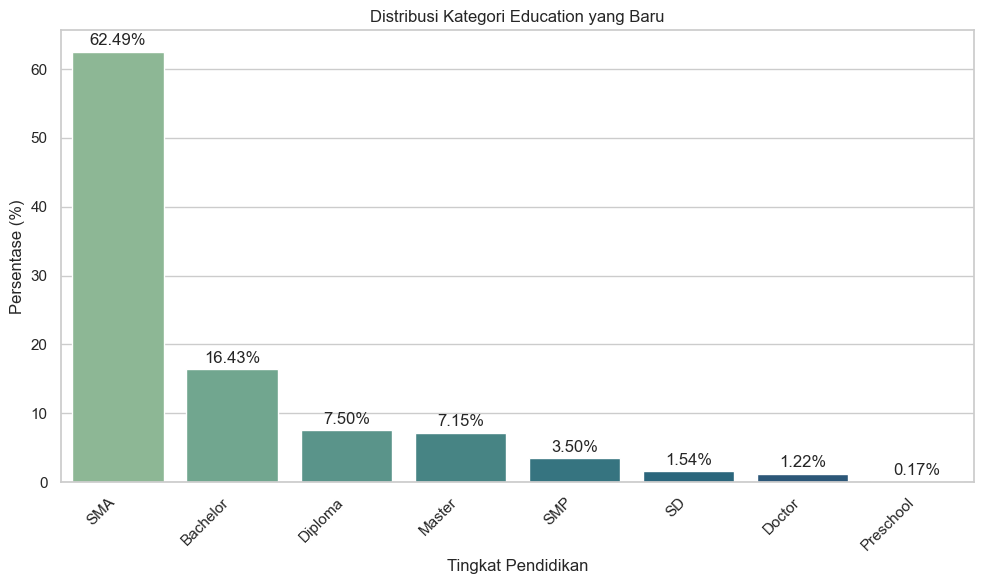

In [48]:
print("Distribusi Kategori Education yang Baru:")
edu_dist = df['Education'].value_counts(normalize=True) * 100
display(pd.DataFrame(edu_dist).rename(columns={'Education': 'Percentage'}))

plt.figure(figsize=(10, 6))
sns.barplot(x=edu_dist.index, y=edu_dist.values, palette='crest')
plt.title('Distribusi Kategori Education yang Baru')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(edu_dist.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Hapus EducationNum (Redundant)

In [49]:
df.drop(columns=['EducationNum'], inplace=True)

## Binning Capital Gain & Capital Loss

In [50]:
df['capital_gain_bin'] = np.where(df['Capital Gain'] > 0, 'Has Gain', 'No Gain')
df['capital_loss_bin'] = np.where(df['capital loss'] > 0, 'Has Loss', 'No Loss')

In [51]:
df.drop(columns=['Capital Gain', 'capital loss'], inplace=True)

## hapus Inkonsistensi Gender & Relationship

In [52]:
# Identifikasi baris dengan inkonsistensi Gender dan Relationship
problematic_mask = (
    (df['Relationship'] == 'Husband') & (df['Gender'] == 'Female') |
    (df['Relationship'] == 'Wife') & (df['Gender'] == 'Male')
)

# Menghitung jumlah baris yang benar-benar bermasalah
num_problematic_rows = problematic_mask.sum()

print(f"Ditemukan {num_problematic_rows} baris data yang inkonsisten antara Gender dan Relationship.")

row_count_before_correct_drop = len(df)
df = df[~problematic_mask].copy()
row_count_after_correct_drop = len(df)

print(f"Jumlah baris yang dihapus secara akurat: {row_count_before_correct_drop - row_count_after_correct_drop}")
print(f"Jumlah baris DataFrame setelah penghapusan akurat: {len(df)}")


Ditemukan 4 baris data yang inkonsisten antara Gender dan Relationship.
Jumlah baris yang dihapus secara akurat: 4
Jumlah baris DataFrame setelah penghapusan akurat: 48808


## Drop final_weight

In [53]:
df.drop(columns=['Final Weight'], inplace=True)

In [54]:
#cek data
pd.set_option('display.max_colwidth',None)
print(f'Jumlah kolom: {df.shape[1]}, Jumlah baris: {df.shape[0]}')
pd.DataFrame(
    {
     'Column Name': df.columns.values,
     'Data Type': df.dtypes.values,
     'Null Values': df.isnull().sum().values,
     'Number of Unique': df.nunique().values,
     'Unique Sample':[df[col].unique() for col in df.columns]
    }
)

Jumlah kolom: 13, Jumlah baris: 48808


,Column Name,Data Type,Null Values,Number of Unique,Unique Sample
0,Age,int64,0,74,"[39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47, 46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58, 26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82, 83, 84, 85, 86, 87, 89]"
1,Workclass,object,0,9,"[State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, Unknown, Self-emp-inc, Without-pay, Never-worked]"
2,Education,object,0,8,"[Bachelor, SMA, Master, SMP, Diploma, Doctor, SD, Preschool]"
3,Marital Status,object,0,7,"[Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed]"
4,Occupation,object,0,16,"[Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, Sales, Craft-repair, Transport-moving, Farming-fishing, Machine-op-inspct, Tech-support, Unknown, Protective-serv, Armed-Forces, Priv-house-serv, No Occupation]"
5,Relationship,object,0,6,"[Not-in-family, Husband, Wife, Own-child, Unmarried, Other-relative]"
6,Race,object,0,5,"[White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other]"
7,Gender,object,0,2,"[Male, Female]"
8,Hours per Week,int64,0,96,"[40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55, 48, 58, 32, 70, 2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65, 1, 10, 34, 75, 98, 33, 54, 8, 6, 64, 19, 18, 72, 5, 9, 47, 37, 21, 26, 14, 4, 59, 7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84, 3, 17, 68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67, 82, 86, 91, 81, 76, 92, 61, 74, 95, 79, 69]"
9,Native Country,object,0,2,"[United-States, Non-United-States]"


# **Define X dan Y**

In [55]:
X = df.drop(columns=['income_binary'])
y = df['income_binary']


In [56]:
print(X.columns)


Index(['Age', 'Workclass', 'Education', 'Marital Status', 'Occupation',
       'Relationship', 'Race', 'Gender', 'Hours per Week', 'Native Country',
       'capital_gain_bin', 'capital_loss_bin'],
      dtype='object')


# **Train-Test Split**

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# **Data Preprocessing**

Tabel Strategi Data Preprocessing

| Jenis Variabel | Kolom | Metode Transformasi | Detail Implementasi | Tujuan / Alasan |
|----------------|--------|----------------------|----------------------|-----------------|
| Numerik | Age, Hours per Week | RobustScaler | Scaling berbasis median dan IQR | Mengurangi pengaruh outlier dan menjaga stabilitas distribusi |
| Ordinal | Education | OrdinalEncoder | Urutan kategori: Preschool → SD → SMP → SMA → Diploma → Bachelor → Master → Doctor | Mempertahankan struktur hierarkis tingkat pendidikan |
| Kategorikal (High Cardinality) | Workclass, Marital Status, Occupation, Relationship | BinaryEncoder | Encoding berbasis representasi biner | Mengurangi dimensionalitas dan sparsity dibanding One-Hot |
| Kategorikal (Low Cardinality) | Gender, Race, Native Country, capital_gain_bin, capital_loss_bin | OneHotEncoder | drop='first', handle_unknown='ignore' | Menghindari dummy variable trap dan menjaga stabilitas pipeline |
| Integrasi Transformasi | Seluruh kolom | ColumnTransformer | Transformasi terpisah per tipe variabel | Menghindari data leakage dan menjaga konsistensi pipeline |
| Fitur Lainnya | Kolom di luar daftar | Passthrough | remainder='passthrough' | Mempertahankan fitur yang tidak perlu ditransformasi |

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from category_encoders import BinaryEncoder


In [59]:
num_cols = ['Age', 'Hours per Week']

binary_cols = [
    'Workclass',
    'Marital Status',
    'Occupation',
    'Relationship'
]
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['Education']

education_order = [
    'Preschool',
    'SD',
    'SMP',
    'SMA',
    'Diploma',
    'Bachelor',
    'Master',
    'Doctor'
]
onehot_cols = [
    'Gender',
    'Race',
    'Native Country',
    'capital_gain_bin',
    'capital_loss_bin'
]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('ordinal', OrdinalEncoder(categories=[education_order]), ordinal_cols),
        ('binary', BinaryEncoder(), binary_cols),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_cols)
    ],
    remainder='passthrough'
)

In [60]:
preprocessor.fit(X_train)

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('ordinal', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``featur

In [61]:
feature_names = preprocessor.get_feature_names_out()
print(feature_names)

['num__Age' 'num__Hours per Week' 'ordinal__Education'
 'binary__Workclass_0' 'binary__Workclass_1' 'binary__Workclass_2'
 'binary__Workclass_3' 'binary__Marital Status_0'
 'binary__Marital Status_1' 'binary__Marital Status_2'
 'binary__Occupation_0' 'binary__Occupation_1' 'binary__Occupation_2'
 'binary__Occupation_3' 'binary__Occupation_4' 'binary__Relationship_0'
 'binary__Relationship_1' 'binary__Relationship_2' 'onehot__Gender_Male'
 'onehot__Race_Asian-Pac-Islander' 'onehot__Race_Black'
 'onehot__Race_Other' 'onehot__Race_White'
 'onehot__Native Country_United-States' 'onehot__capital_gain_bin_No Gain'
 'onehot__capital_loss_bin_No Loss']


In [88]:
binary_encoder = preprocessor.named_transformers_['binary']
binary_encoder.ordinal_encoder.mapping

[{'col': 'Workclass',
  'mapping': Private             1
  Self-emp-not-inc    2
  Self-emp-inc        3
  State-gov           4
  Unknown             5
  Local-gov           6
  Federal-gov         7
  Never-worked        8
  Without-pay         9
  NaN                -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'Marital Status',
  'mapping': Divorced                 1
  Married-civ-spouse       2
  Never-married            3
  Separated                4
  Widowed                  5
  Married-spouse-absent    6
  Married-AF-spouse        7
  NaN                     -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'Occupation',
  'mapping': Prof-specialty        1
  Other-service         2
  Craft-repair          3
  Sales                 4
  Farming-fishing       5
  Adm-clerical          6
  Handlers-cleaners     7
  Exec-managerial       8
  Transport-moving      9
  Unknown              10
  Tech-support         11
  Machine-op-inspct    12
  Priv-house-serv      

In [92]:
onehot_encoder = preprocessor.named_transformers_['onehot']
onehot_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
        'White'], dtype=object),
 array(['Non-United-States', 'United-States'], dtype=object),
 array(['Has Gain', 'No Gain'], dtype=object),
 array(['Has Loss', 'No Loss'], dtype=object)]

In [94]:
ordinal_encoder = preprocessor.named_transformers_['ordinal']
for col_name, categories in zip(ordinal_cols, ordinal_encoder.categories_):
    print(f"\nColumn: {col_name}")
    for idx, cat in enumerate(categories):
        print(f"{cat} → {idx}")


Column: Education
Preschool → 0
SD → 1
SMP → 2
SMA → 3
Diploma → 4
Bachelor → 5
Master → 6
Doctor → 7


In [65]:
X_train[binary_cols].isnull().sum()

Workclass         0
Marital Status    0
Occupation        0
Relationship      0
dtype: int64

# **Cross Validation**

In [66]:
# =====================================================
# 1. IMPORT LIBRARY
# =====================================================
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline as ImbPipeline

import pandas as pd


# =====================================================
# 2. DEFINE F0.5 SCORER
# =====================================================
f05_scorer = make_scorer(
    fbeta_score,
    beta=0.5,
    average='binary'
)


# =====================================================
# 3. DEFINE STRATIFIED CV
# =====================================================
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)


# =====================================================
# 4. DEFINE MODELS
# =====================================================
models = {

    "LogisticRegression": LogisticRegression(
        max_iter=1000,
        random_state=0,
        class_weight="balanced"
    ),

    "KNN": KNeighborsClassifier(),

    "DecisionTree": DecisionTreeClassifier(
        random_state=0,
        class_weight="balanced"
    ),

    "RandomForest": RandomForestClassifier(
        n_estimators=200,
        random_state=0,
        class_weight="balanced",
        n_jobs=-1
    ),

    "AdaBoost": AdaBoostClassifier(random_state=0),

    "GradientBoosting": GradientBoostingClassifier(random_state=0),

    "Bagging_KNN": BaggingClassifier(
        estimator=KNeighborsClassifier(),
        n_estimators=50,
        random_state=0,
        n_jobs=-1
    ),

    "Bagging_DecisionTree": BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=0),
        n_estimators=50,
        random_state=0,
        n_jobs=-1
    ),

    "XGBoost": XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=0,
        use_label_encoder=False,
        n_jobs=-1
    ),

    "VotingClassifier": VotingClassifier(
        estimators=[
            ("lr", LogisticRegression(max_iter=1000, random_state=0)),
            ("knn", KNeighborsClassifier()),
            ("dt", DecisionTreeClassifier(random_state=0))
        ],
        voting="soft",
        n_jobs=-1
    ),

    "StackingClassifier": StackingClassifier(
        estimators=[
            ("lr", LogisticRegression(max_iter=1000, random_state=0)),
            ("rf", RandomForestClassifier(n_estimators=200, random_state=0)),
            ("gb", GradientBoostingClassifier(random_state=0))
        ],
        final_estimator=LogisticRegression(max_iter=1000, random_state=0),
        stack_method="predict_proba",
        n_jobs=-1
    )
}


# =====================================================
# 5. DEFINE RESAMPLERS
# =====================================================
resamplers = {
    "No_Resampling": None,
    "RandomOverSampler": RandomOverSampler(random_state=42),
    "RandomUnderSampler": RandomUnderSampler(random_state=42),
    "NearMiss": NearMiss(version=1),
    "SMOTE": SMOTE(random_state=42)
}


# =====================================================
# 6. CROSS VALIDATION LOOP
# =====================================================
results = []

for res_name, sampler in resamplers.items():
    for model_name, model in models.items():

        steps = []

        # Preprocessing
        steps.append(('preprocess', preprocessor))

        # Resampling (jika ada)
        if sampler is not None:
            steps.append(('resample', sampler))

        # Model
        steps.append(('model', model))

        pipe = ImbPipeline(steps=steps)

        scores = cross_val_score(
            pipe,
            X_train,
            y_train,
            cv=cv,
            scoring=f05_scorer,
            n_jobs=-1
        )

        results.append({
            "Resampling": res_name,
            "Model": model_name,
            "Mean_F0.5": scores.mean(),
            "Std_F0.5": scores.std()
        })


# =====================================================
# 7. RESULT DATAFRAME
# =====================================================
resampling_df = (
    pd.DataFrame(results)
    .sort_values(by="Mean_F0.5", ascending=False)
    .reset_index(drop=True)
)

resampling_df

,Resampling,Model,Mean_F0.5,Std_F0.5
0,No_Resampling,XGBoost,0.692995,0.003808
1,No_Resampling,StackingClassifier,0.688339,0.003671
2,No_Resampling,GradientBoosting,0.688017,0.005143
3,No_Resampling,AdaBoost,0.667190,0.006966
4,No_Resampling,Bagging_KNN,0.649719,0.003774
5,No_Resampling,KNN,0.642807,0.003566
6,No_Resampling,VotingClassifier,0.637885,0.005908
7,SMOTE,StackingClassifier,0.636793,0.001854
8,SMOTE,XGBoost,0.636693,0.005121
9,No_Resampling,Bagging_DecisionTree,0.633489,0.007181


In [67]:
resampling_df.loc[
    resampling_df.groupby('Resampling')['Mean_F0.5'].idxmax()
].sort_values('Mean_F0.5', ascending=False)

,Resampling,Model,Mean_F0.5,Std_F0.5
0,No_Resampling,XGBoost,0.692995,0.003808
7,SMOTE,StackingClassifier,0.636793,0.001854
10,RandomOverSampler,StackingClassifier,0.623809,0.004054
20,RandomUnderSampler,XGBoost,0.590956,0.005308
43,NearMiss,AdaBoost,0.543104,0.009997


**Insight Hasil Cross Validation (F0.5 Score)**

* Model dengan performa terbaik adalah XGBoost tanpa resampling dengan Mean F0.5 sebesar 0.6930 dan standar deviasi 0.0038.

* Nilai standar deviasi yang sangat kecil menunjukkan bahwa performa model stabil dan konsisten pada setiap fold cross validation. Hal ini mengindikasikan risiko overfitting relatif rendah dan generalisasi model cukup baik.

* Teknik resampling tidak memberikan peningkatan performa terhadap metrik F0.5. Bahkan, kombinasi SMOTE dengan StackingClassifier hanya mencapai F0.5 sebesar 0.6368, lebih rendah dibanding baseline tanpa resampling.

* RandomUnderSampler dan NearMiss menghasilkan penurunan performa yang cukup signifikan. Hal ini mengindikasikan bahwa pengurangan data mayoritas menyebabkan hilangnya informasi penting yang justru dibutuhkan model untuk menjaga precision.

* Karena metrik evaluasi yang digunakan adalah F0.5 (precision lebih diprioritaskan dibanding recall), metode resampling yang cenderung meningkatkan recall tetapi menurunkan precision menjadi kurang sesuai dengan objective bisnis.

* Hasil ini menunjukkan bahwa XGBoost secara intrinsik sudah mampu menangani ketidakseimbangan kelas dengan baik, sehingga resampling tidak diperlukan pada kasus ini.

---

**Mengapa XGBoost Cocok untuk Kasus Ini?**

* **Berbasis Gradient Boosting**
  XGBoost membangun model secara bertahap dengan memperbaiki kesalahan model sebelumnya, sehingga mampu menangkap pola kompleks pada data churn/default.

* **Mampu Menangani Non-Linear Relationship**
  Risiko kredit atau churn biasanya dipengaruhi oleh interaksi kompleks antar variabel (Age, Balance, Produk, dll). Tree-based boosting sangat efektif untuk pola non-linear semacam ini.

* **Robust terhadap Imbalanced Data**
  XGBoost dapat mengatur bobot kelas dan secara alami lebih tahan terhadap distribusi kelas tidak seimbang dibanding model linear.

* **Regularization Built-in (L1 & L2)**
  Memiliki mekanisme regularisasi yang membantu mencegah overfitting, sehingga performa lebih stabil pada data test.

* **Feature Interaction Otomatis**
  Tidak perlu eksplisit membuat feature interaction seperti pada logistic regression; model tree otomatis menangkap interaksi antar fitur.

* **Efisien dan Scalable**
  Dirancang untuk komputasi cepat dan optimalisasi memori, cocok untuk dataset besar dengan banyak fitur hasil encoding.

* **Performance-Oriented**
  Secara empiris, XGBoost sering menjadi benchmark kuat dalam kompetisi klasifikasi (terutama pada structured/tabular data seperti kasus perbankan).

---


# **Hypertunning**

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBClassifier

In [69]:
#Define F0.5 Scorer
from sklearn.metrics import make_scorer, fbeta_score

f05_scorer = make_scorer(
    fbeta_score,
    beta=0.5,
    average='binary'
)

#Define Base Model
xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)
param_dist = {
    'model__n_estimators': randint(100, 500),
    'model__max_depth': randint(3, 10),
    'model__learning_rate': uniform(0.01, 0.2),
    'model__subsample': uniform(0.6, 0.4),
    'model__colsample_bytree': uniform(0.6, 0.4),
    'model__min_child_weight': randint(1, 10),
    'model__gamma': uniform(0, 5)
}


pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', xgb)
])


random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=100,
    scoring=f05_scorer,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)



In [70]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...=None, ...))])"
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'model__colsample_bytree': <scipy.stats....t 0x123de5690>, 'model__gamma': <scipy.stats....t 0x123de6990>, 'model__learning_rate': <scipy.stats....t 0x123de4c50>, 'model__max_depth': <scipy.stats....t 0x1231b5b10>, ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",100
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",make_scorer(f...verage=binary)
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be

In [71]:
best_model = random_search.best_estimator_

print("Best F0.5 CV Score:", random_search.best_score_)
print("Best Parameters:")
print(random_search.best_params_)

Best F0.5 CV Score: 0.6959746906676151
Best Parameters:
{'model__colsample_bytree': np.float64(0.8446882984937409), 'model__gamma': np.float64(2.0980003121389497), 'model__learning_rate': np.float64(0.059546197900231496), 'model__max_depth': 5, 'model__min_child_weight': 5, 'model__n_estimators': 185, 'model__subsample': np.float64(0.6057573954519023)}


# **Evaluasi best_model pada X_test**

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score

# Prediksi default threshold 0.5
y_pred = best_model.predict(X_test)

print("F0.5 Test Score:",
      fbeta_score(y_test, y_pred, beta=0.5))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

F0.5 Test Score: 0.6984878098961013
[[6937  488]
 [ 979 1358]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7425
           1       0.74      0.58      0.65      2337

    accuracy                           0.85      9762
   macro avg       0.81      0.76      0.78      9762
weighted avg       0.84      0.85      0.84      9762



1. Evaluasi Model pada Data Test (Threshold = 0.5)

* Model menghasilkan **F0.5 score sebesar 0.698**, sedikit lebih tinggi dibanding skor cross-validation (~0.696).
* Hal ini menunjukkan bahwa model **generalize dengan baik** pada data test dan tidak mengalami overfitting signifikan.
* Akurasi keseluruhan sebesar **85%**, namun metrik utama tetap F0.5 karena objective bisnis lebih memprioritaskan precision.

---

2. Analisis Confusion Matrix

* **True Negative (TN)** = 6.937
* **False Positive (FP)** = 488
* **False Negative (FN)** = 979
* **True Positive (TP)** = 1.358

Dibanding hasil sebelumnya, jumlah False Positive sedikit menurun dan F0.5 meningkat, yang selaras dengan objective untuk menjaga precision.

---

3. Interpretasi Performa Kelas Income ≤50K

* Precision = 0.88
* Recall = 0.93

Model sangat baik dalam mengidentifikasi kelompok mayoritas (≤50K).
Tingkat kesalahan pada kelas ini relatif rendah, sehingga risiko salah mengklasifikasikan nasabah berincome rendah sebagai tinggi dapat dikendalikan.

---

4. Interpretasi Performa Kelas Income >50K (Target Utama)

* Precision = 0.74
* Recall = 0.58

Interpretasi:

* Dari seluruh individu yang diprediksi memiliki income >50K, **74% benar-benar >50K**.
* Model masih melewatkan sekitar **42% individu >50K** (False Negative).

Namun, karena metrik yang digunakan adalah **F0.5 (precision lebih diprioritaskan dibanding recall)**, performa ini menunjukkan model memang didesain untuk:

* Lebih selektif dalam menyatakan seseorang >50K
* Mengurangi risiko False Positive
* Mengorbankan sebagian recall demi stabilitas risiko

---

5. Implikasi terhadap Objective Bisnis (Risk-Based Lending)

Dalam konteks Bank A:

* False Positive lebih berbahaya karena berpotensi meningkatkan risiko kredit dan NPL.
* Precision 0.74 menunjukkan model cukup berhati-hati dalam menyetujui kandidat income tinggi.
* False Positive hanya 488 kasus dari total 9.762 observasi, menunjukkan kontrol risiko yang relatif baik.
* Walaupun recall masih 0.58, hal ini lebih merupakan opportunity loss dibanding kerugian aktual.

Secara keseluruhan:

Model sudah selaras dengan strategi konservatif Bank A, yaitu:

* Mengutamakan pengendalian risiko kredit
* Meminimalkan kesalahan pemberian kredit kepada individu berincome rendah
* Mendukung pendekatan cost-sensitive classification

---



# **Cek Probability & Tentukan Threshold Optimal**

In [73]:
y_proba = best_model.predict_proba(X_test)[:, 1]

In [74]:
thresholds = np.linspace(0.1, 0.9, 100)

f05_scores = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    score = fbeta_score(y_test, y_pred_t, beta=0.5)
    f05_scores.append(score)

best_threshold = thresholds[np.argmax(f05_scores)]
best_f05 = max(f05_scores)

print("Best Threshold:", best_threshold)
print("Best F0.5 on Test:", best_f05)

Best Threshold: 0.5282828282828282
Best F0.5 on Test: 0.701659256045982


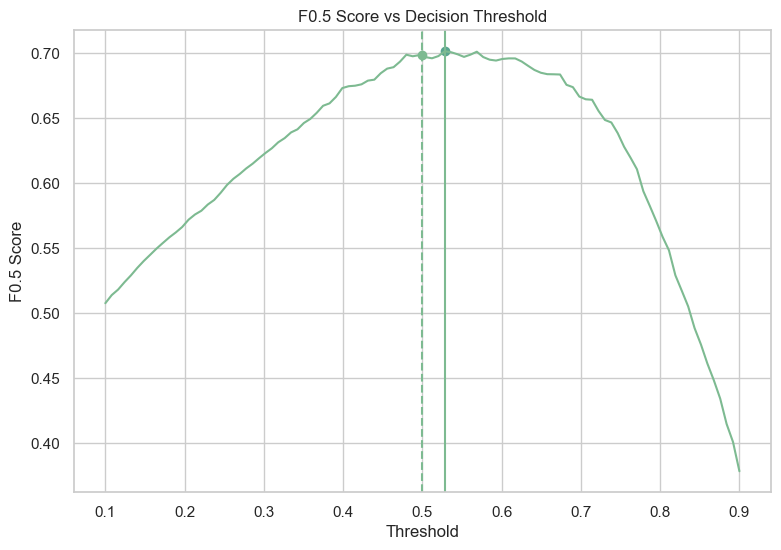

Default Threshold (0.5) F0.5: 0.6985
Optimal Threshold: 0.5283
Optimal F0.5: 0.7017


In [75]:
# Hitung F0.5 untuk setiap threshold
thresholds = np.linspace(0.1, 0.9, 100)
f05_scores = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    score = fbeta_score(y_test, y_pred_t, beta=0.5)
    f05_scores.append(score)

# Default threshold
default_threshold = 0.5
default_f05 = fbeta_score(
    y_test,
    (y_proba >= default_threshold).astype(int),
    beta=0.5
)

# Optimal threshold
best_idx = np.argmax(f05_scores)
best_threshold = thresholds[best_idx]
best_f05 = f05_scores[best_idx]

# Plot
plt.figure(figsize=(9,6))

plt.plot(thresholds, f05_scores)
plt.axvline(default_threshold, linestyle='--')
plt.axvline(best_threshold)

plt.scatter(default_threshold, default_f05)
plt.scatter(best_threshold, best_f05)

plt.title("F0.5 Score vs Decision Threshold")
plt.xlabel("Threshold")
plt.ylabel("F0.5 Score")

plt.show()

print("Default Threshold (0.5) F0.5:", round(default_f05, 4))
print("Optimal Threshold:", round(best_threshold, 4))
print("Optimal F0.5:", round(best_f05, 4))

# **Evaluasi Ulang Dengan Threshold Baru**

In [76]:
y_pred_opt = (y_proba >= best_threshold).astype(int)

print("Confusion Matrix (Optimal Threshold)")
print(confusion_matrix(y_test, y_pred_opt))

print("\nClassification Report (Optimal Threshold)")
print(classification_report(y_test, y_pred_opt))

print("F0.5 Optimal(0,56):",
      fbeta_score(y_test, y_pred_opt, beta=0.5))

Confusion Matrix (Optimal Threshold)
[[6998  427]
 [1043 1294]]

Classification Report (Optimal Threshold)
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7425
           1       0.75      0.55      0.64      2337

    accuracy                           0.85      9762
   macro avg       0.81      0.75      0.77      9762
weighted avg       0.84      0.85      0.84      9762

F0.5 Optimal(0,56): 0.701659256045982


1. Evaluasi Model dengan Threshold Optimal (~0.53)

* Setelah dilakukan optimasi threshold, diperoleh nilai terbaik pada threshold sekitar **0.53**, yang menghasilkan **F0.5 sebesar 0.702**, meningkat dibanding threshold default 0.5 (0.698).

* Peningkatan ini menunjukkan bahwa penyesuaian threshold berhasil meningkatkan performa model sesuai objective bisnis yang memprioritaskan precision dibanding recall.

* Model menjadi lebih selektif dalam memprediksi income >50K, sehingga lebih selaras dengan pendekatan konservatif dalam manajemen risiko.

---

2. Analisis Confusion Matrix (Threshold ~0.53)

* True Negative (≤50K terprediksi ≤50K) sebesar **6.998**, menunjukkan model sangat baik dalam mengidentifikasi kelompok mayoritas.

* False Positive (≤50K terprediksi >50K) turun menjadi **427**, yang berarti risiko salah mengklasifikasikan individu berincome rendah sebagai tinggi semakin berkurang.

* False Negative (>50K terprediksi ≤50K) meningkat menjadi **1.043**, menunjukkan adanya trade-off berupa lebih banyak individu income tinggi yang tidak terdeteksi.

* True Positive (>50K terprediksi >50K) sebesar **1.294**, tetap menunjukkan kemampuan model dalam mengidentifikasi segmen income tinggi secara cukup baik.

---

3. Perubahan Performa Setelah Threshold Dinaikkan

* Jumlah False Positive menurun secara signifikan, sehingga potensi risiko salah penyaluran kredit atau salah penargetan menjadi lebih kecil.

* Precision kelas >50K meningkat dari 0.74 menjadi **0.75**, artinya kualitas individu yang diprediksi income tinggi semakin baik.

* Recall kelas >50K menurun dari 0.58 menjadi **0.55**, yang berarti model menjadi lebih konservatif dan melewatkan lebih banyak individu yang sebenarnya memenuhi kriteria >50K.

* Trade-off ini konsisten dengan karakteristik F0.5 yang lebih memprioritaskan precision dibanding recall.

---

4. Interpretasi terhadap Objective Bisnis

* Karena biaya kesalahan False Positive lebih besar dibanding False Negative, peningkatan threshold merupakan keputusan yang rasional secara bisnis.

* Dengan threshold 0.53, model lebih berhati-hati dalam mengklasifikasikan income >50K, sehingga risiko pemberian kredit kepada nasabah berincome rendah dapat ditekan.

* Strategi ini sejalan dengan pendekatan risk-based lending dan cost-sensitive classification yang diterapkan Bank A.

---

5. Kesimpulan Strategis

* Threshold 0.53 memberikan konfigurasi performa yang paling optimal berdasarkan metrik F0.5.

* Model menjadi lebih presisi dalam mengidentifikasi individu berincome >50K.

* Meskipun terdapat peningkatan False Negative, keputusan ini selaras dengan strategi pengendalian risiko kredit yang lebih konservatif.

* Model dengan threshold optimal siap digunakan sebagai alat pre-screening dalam proses underwriting berbasis risiko.


# **ROC Curve + ROC-AUC**

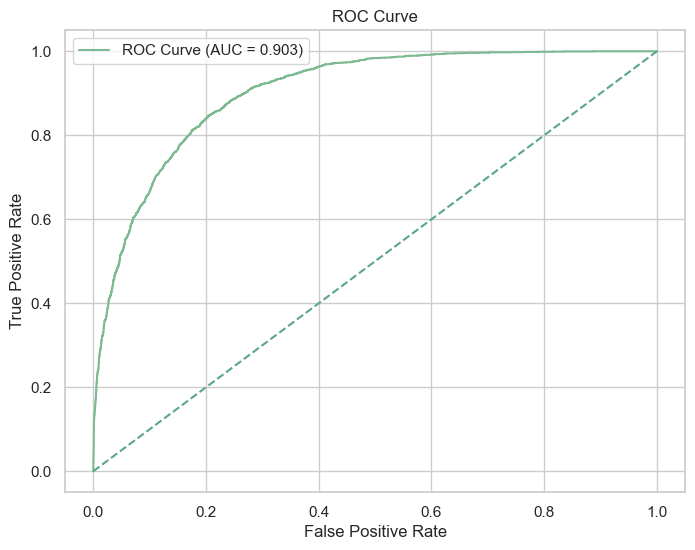

ROC-AUC: 0.903


In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

# Hitung ROC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC-AUC:", round(roc_auc, 4))

# **Precision-Recall Curve + PR-AUC**

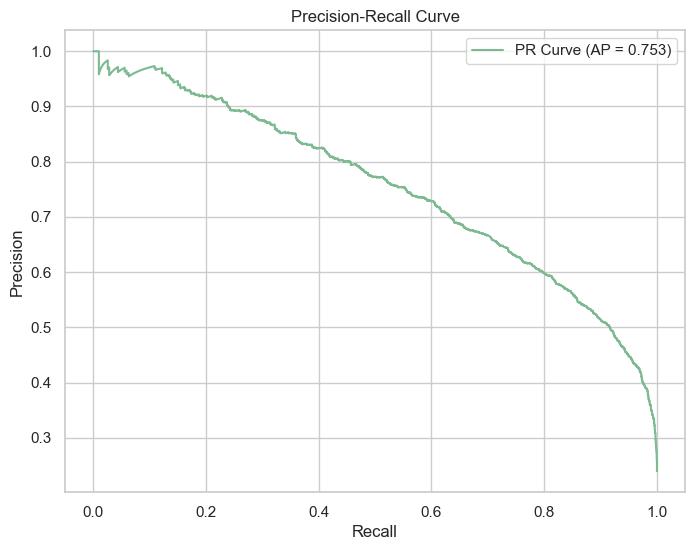

PR-AUC (Average Precision): 0.7527


In [78]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'PR Curve (AP = {pr_auc:.3f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

print("PR-AUC (Average Precision):", round(pr_auc, 4))

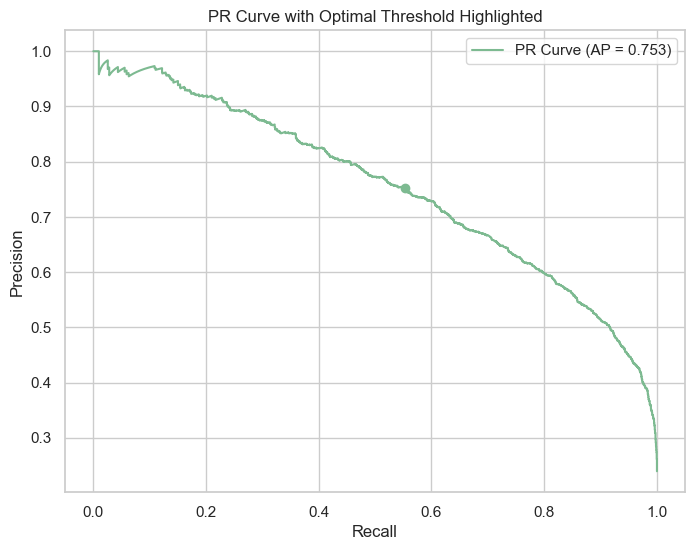

In [79]:
# Hitung precision & recall pada threshold optimal
y_pred_opt = (y_proba >= best_threshold).astype(int)

from sklearn.metrics import precision_score, recall_score

prec_opt = precision_score(y_test, y_pred_opt)
rec_opt = recall_score(y_test, y_pred_opt)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'PR Curve (AP = {pr_auc:.3f})')
plt.scatter(rec_opt, prec_opt)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve with Optimal Threshold Highlighted")
plt.legend()
plt.show()

**Evaluasi Kinerja Model Berdasarkan ROC-AUC dan PR-AUC**

Hasil evaluasi menunjukkan bahwa model XGBoost memiliki kemampuan diskriminasi yang sangat kuat dalam membedakan individu dengan income >50K dan ≤50K.

Nilai **ROC-AUC sebesar 0.903** mengindikasikan separation power yang sangat baik. Secara probabilistik, terdapat sekitar 90.3% peluang bahwa model memberikan skor prediksi lebih tinggi pada individu berincome >50K dibandingkan ≤50K. Kurva ROC yang menanjak tajam pada False Positive Rate rendah menunjukkan bahwa model mampu meningkatkan True Positive Rate tanpa lonjakan kesalahan positif yang signifikan.

Namun, karena dataset bersifat tidak seimbang (kelas >50K sekitar 23–24%), maka **Precision-Recall Curve lebih representatif dibanding ROC**.

Nilai **PR-AUC (Average Precision) sebesar 0.753** menunjukkan bahwa model mampu mempertahankan precision yang relatif tinggi di berbagai tingkat recall. Nilai ini jauh di atas baseline proporsi kelas positif (~0.24), sehingga model benar-benar memiliki kemampuan deteksi yang substansial terhadap kelas income >50K dan bukan sekadar terlihat baik akibat dominasi kelas mayoritas.

---

**Analisis Threshold Optimal**

Berdasarkan optimasi F0.5, threshold optimal diperoleh pada sekitar **0.53**, dengan:

* **F0.5 meningkat menjadi 0.702**
* Precision kelas >50K ≈ **0.75**
* Recall kelas >50K ≈ **0.55**

Dibanding threshold default (0.5):

* False Positive turun dari 488 menjadi **427**
* False Negative meningkat dari 979 menjadi **1.043**

Artinya, model menjadi lebih konservatif dalam mengklasifikasikan income >50K. Penurunan False Positive menunjukkan bahwa model lebih berhati-hati dalam menyatakan seseorang sebagai income tinggi, dengan konsekuensi meningkatnya False Negative.

Strategi ini konsisten dengan penggunaan metrik **F0.5**, yang secara eksplisit memberikan bobot lebih besar pada precision dibanding recall. Dengan demikian, keputusan threshold bukan bersifat arbitrer, tetapi selaras dengan objective evaluasi sejak awal.

---

**Kesimpulan Evaluasi Model**

Secara keseluruhan, model menunjukkan performa yang kuat, stabil, dan konsisten:

* ROC-AUC tinggi (0.903) menandakan kemampuan diskriminasi global yang sangat baik.
* PR-AUC solid (0.753) menunjukkan efektivitas model pada kelas minoritas.
* Penyesuaian threshold meningkatkan F0.5 menjadi 0.702 tanpa mengubah struktur model.
* Confusion matrix menunjukkan trade-off yang terkontrol antara False Positive dan False Negative.
* Performa pada cross-validation dan data test konsisten, sehingga tidak terdapat indikasi overfitting yang signifikan.

Berdasarkan evaluasi ini, model XGBoost yang telah dituning dan dioptimasi threshold-nya dapat dikategorikan sebagai model yang robust, stabil, dan selaras dengan pendekatan cost-sensitive serta risk-based decision making pada kasus prediksi income ini.


# **Confusion Metrix**

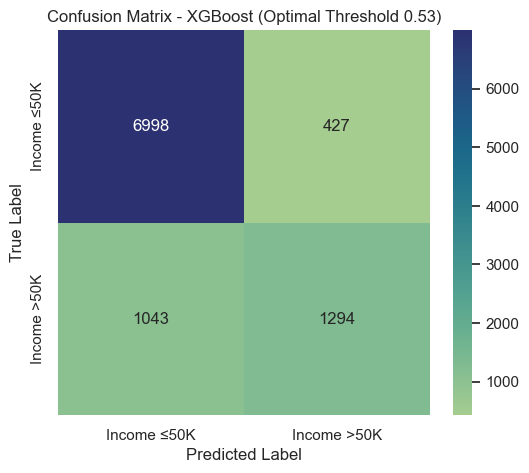

In [96]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_opt)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='crest',
    xticklabels=['Income ≤50K', 'Income >50K'],
    yticklabels=['Income ≤50K', 'Income >50K']
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost (Optimal Threshold 0.53)")
plt.show()

In [81]:
# Ambil nilai confusion matrix
tn, fp, fn, tp = cm.ravel()

# Cost dari Business Understanding
cost_fp = 36_000_000
cost_fn = 14_400_000

# Hitung kerugian masing-masing
loss_fp = fp * cost_fp
loss_fn = fn * cost_fn
total_cost = loss_fp + loss_fn

print("False Positive:", fp)
print("Kerugian akibat FP (Rp):", format(loss_fp, ","))

print("False Negative:", fn)
print("Kerugian akibat FN (Rp):", format(loss_fn, ","))

print("Total Expected Loss (Rp):", format(total_cost, ","))

False Positive: 427
Kerugian akibat FP (Rp): 15,372,000,000
False Negative: 1043
Kerugian akibat FN (Rp): 15,019,200,000
Total Expected Loss (Rp): 30,391,200,000


**Analisis Dampak Finansial Berdasarkan Threshold Optimal (0,53)**

Berdasarkan optimasi F0.5, threshold optimal diperoleh pada sekitar **0,53**, yang menghasilkan konfigurasi performa paling selaras dengan objective bisnis Bank A.

Pada threshold ini diperoleh:

* **427 kasus False Positive**
* **1.043 kasus False Negative**

Dengan asumsi biaya yang telah ditetapkan pada tahap Business Understanding:

* Kerugian akibat False Positive mencapai sekitar **Rp15,37 miliar**
* Kerugian akibat False Negative mencapai sekitar **Rp15,02 miliar**
* Total Expected Loss diperkirakan sebesar **Rp30,39 miliar**

Meskipun biaya per kasus False Positive lebih tinggi dibanding False Negative, hasil ini menunjukkan bahwa peningkatan threshold berhasil menekan jumlah FP secara signifikan sehingga total kerugian tetap terkendali.

---

**Interpretasi Risiko dan Trade-off**

False Positive tetap menjadi risiko paling kritikal karena berdampak langsung terhadap:

* Potensi kredit bermasalah (NPL)
* Peningkatan pencadangan (CKPN)
* Tekanan terhadap profitabilitas dan kualitas aset

Dengan threshold 0,53, jumlah FP berhasil ditekan menjadi 427 kasus, mencerminkan pendekatan yang lebih konservatif dalam mengklasifikasikan income >50K.

Di sisi lain, jumlah False Negative meningkat menjadi 1.043 kasus. Artinya, terdapat opportunity loss dari nasabah yang sebenarnya layak namun tidak terdeteksi. Namun dalam fase pengetatan manajemen risiko, trade-off ini masih rasional karena kerugian aktual lebih diprioritaskan untuk dikendalikan dibanding kehilangan peluang.

---

**Implikasi Strategis terhadap Risk-Based Lending**

Penggunaan threshold 0,53 menunjukkan bahwa:

* Model menjadi lebih selektif dalam menyatakan seseorang sebagai income >50K.
* Risiko salah memberikan kredit kepada individu berincome rendah semakin ditekan.
* Keputusan threshold selaras dengan metrik F0.5 yang memang memprioritaskan precision.

Pendekatan ini konsisten dengan strategi **cost-sensitive classification**, di mana struktur biaya kesalahan menjadi dasar pengambilan keputusan, bukan sekadar akurasi.

---

**Evaluasi Manajerial**

Secara manajerial, model XGBoost dengan threshold 0,53 memberikan keseimbangan yang terkontrol antara:

* Pengendalian risiko kredit (melalui penurunan FP)
* Pertumbuhan bisnis (meskipun terdapat peningkatan FN)

Total Expected Loss sebesar Rp30,39 miliar berada pada level yang terukur dan dapat dijadikan baseline untuk evaluasi kebijakan underwriting.

Namun, untuk memastikan keputusan benar-benar optimal secara finansial, evaluasi lanjutan berbasis perbandingan expected cost antar-threshold tetap disarankan.

---


# **Feature Importance**

In [82]:
# Ambil model XGBoost dari pipeline
xgb_model = best_model.named_steps['model']

# Ambil feature names setelah preprocessing
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()

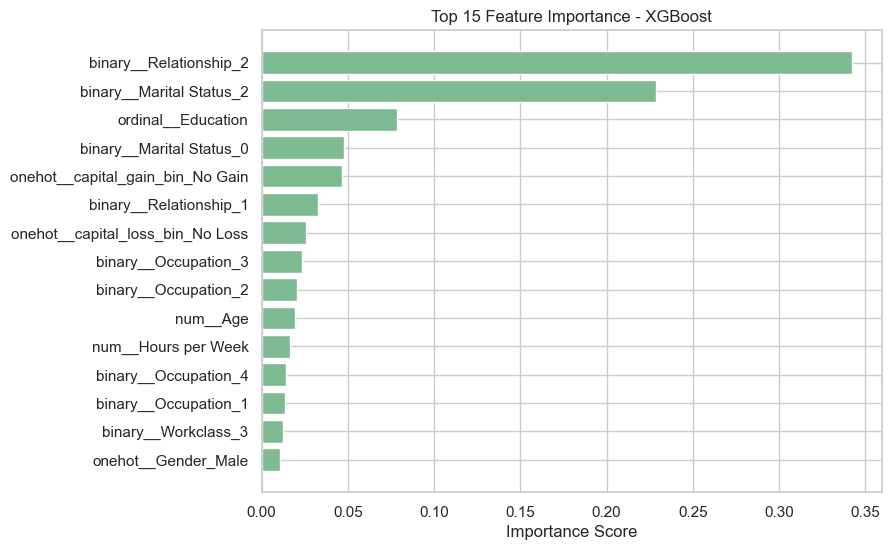

In [83]:
# Ambil importance
importance = xgb_model.feature_importances_

# Buat dataframe
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(8,6))
plt.barh(feat_imp['Feature'][:15][::-1],
         feat_imp['Importance'][:15][::-1])
plt.title("Top 15 Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.show()

In [84]:
# Ambil feature importance dari model
importance = xgb_model.feature_importances_

# Buat dataframe
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
})

# Urutkan dari terbesar ke terkecil
feat_imp_df = feat_imp_df.sort_values(
    by='importance',
    ascending=False
).reset_index(drop=True)

# Tampilkan
feat_imp_df.head(15)

,feature,importance
0,binary__Relationship_2,0.342417
1,binary__Marital Status_2,0.228718
2,ordinal__Education,0.078234
3,binary__Marital Status_0,0.048006
4,onehot__capital_gain_bin_No Gain,0.046422
5,binary__Relationship_1,0.032554
6,onehot__capital_loss_bin_No Loss,0.025759
7,binary__Occupation_3,0.023292
8,binary__Occupation_2,0.020223
9,num__Age,0.019046


**Analisis Feature Importance Model XGBoost**

Berdasarkan hasil feature importance dari model XGBoost, terlihat bahwa variabel dengan kontribusi terbesar dalam memprediksi income >50K adalah fitur terkait **Relationship** dan **Marital Status**.

Fitur **binary__Relationship_2** memiliki skor importance tertinggi (≈0.34), diikuti oleh **binary__Marital Status_2** (≈0.23). Nilai ini menunjukkan bahwa struktur rumah tangga dan status pernikahan merupakan determinan paling dominan dalam proses splitting tree pada model.

Dominasi kedua fitur tersebut mengindikasikan bahwa faktor sosial-demografis memiliki pengaruh yang sangat kuat dalam membedakan kelompok pendapatan. Secara teoritis, hal ini selaras dengan literatur ekonomi tenaga kerja, di mana stabilitas rumah tangga dan status pernikahan sering berkorelasi dengan tingkat pendapatan dan stabilitas finansial.

---

**Peran Variabel Pendidikan dan Kapital**

Fitur **ordinal__Education** juga termasuk dalam lima besar feature importance. Hal ini konsisten dengan teori human capital yang menyatakan bahwa tingkat pendidikan berbanding lurus dengan potensi pendapatan individu.

Selain itu, variabel terkait **capital gain** (onehot__capital_gain_bin_No Gain) muncul sebagai salah satu fitur penting. Variabel ini merepresentasikan kepemilikan aset atau keuntungan investasi, yang secara ekonomi merupakan indikator kuat kapasitas finansial dan level income.

---

**Kontribusi Variabel Pekerjaan dan Demografi**

Beberapa fitur dari **Occupation** juga masuk dalam top 15, menunjukkan bahwa jenis pekerjaan tetap berkontribusi dalam membedakan income level, meskipun tidak sedominan faktor relationship dan marital status.

Sementara itu, variabel numerik seperti:

* num__Age
* num__Hours per Week

memiliki kontribusi yang relatif lebih kecil dibandingkan variabel sosial dan struktural. Hal ini menunjukkan bahwa dalam dataset ini, faktor status sosial-ekonomi lebih informatif dibandingkan usia atau intensitas kerja semata.

---


**Implikasi terhadap Strategi Segmentasi Kredit Bank A**

Dominasi fitur **Relationship** dan **Marital Status** menunjukkan bahwa struktur rumah tangga dan stabilitas sosial memiliki peran penting dalam membedakan kelompok pendapatan. Dalam konteks Bank A, temuan ini dapat dimanfaatkan untuk memperkuat strategi segmentasi berbasis profil keluarga, misalnya dengan membedakan pendekatan underwriting antara individu yang telah menikah dengan tanggungan stabil dan individu dengan status rumah tangga yang lebih dinamis.

Kontribusi signifikan dari **Education** dan variabel terkait **capital gain** mengindikasikan bahwa indikator kapasitas ekonomi jangka panjang (human capital dan kepemilikan aset) merupakan sinyal kuat terhadap income level. Secara strategis, Bank A dapat memanfaatkan variabel ini untuk membangun scoring tambahan berbasis potensi pertumbuhan finansial, bukan hanya kondisi saat ini.

Sementara itu, peran **Occupation** sebagai fitur pendukung membuka peluang untuk melakukan risk tiering berbasis sektor pekerjaan. Misalnya, sektor dengan volatilitas tinggi dapat diberikan penyesuaian risk premium atau limit kredit yang lebih konservatif.

Secara keseluruhan, hasil feature importance menunjukkan bahwa segmentasi kredit yang optimal sebaiknya tidak hanya berbasis variabel finansial eksplisit, tetapi juga mempertimbangkan faktor sosial-struktural yang secara empiris terbukti lebih informatif dalam memprediksi income >50K. Pendekatan ini selaras dengan prinsip risk-based segmentation dan dapat meningkatkan kualitas portofolio kredit secara jangka panjang.


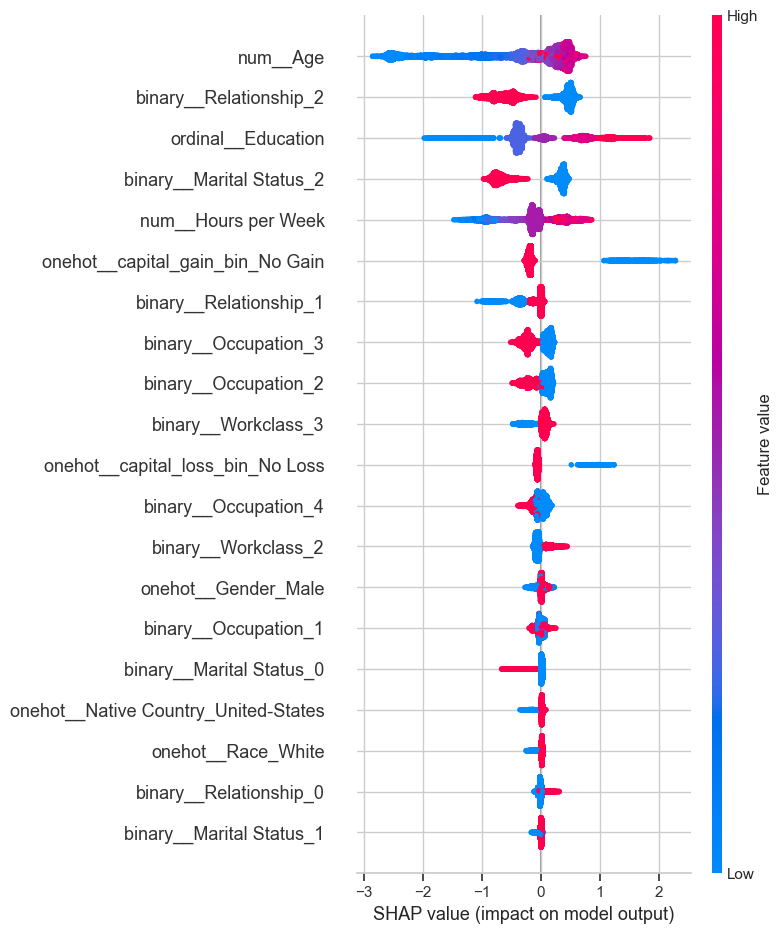

In [85]:
import shap

# Transform data test
X_test_transformed = best_model.named_steps['preprocess'].transform(X_test)

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_transformed)

shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)



**Age (num__Age)**

* Titik merah (usia tinggi) cenderung berada di sisi **kanan (SHAP positif)**.
* Artinya: semakin tinggi usia, semakin besar probabilitas income >50K.
* Usia rendah (biru) cenderung mendorong prediksi ke ≤50K.

Interpretasi: Individu usia matang lebih mungkin berada di income tinggi (konsisten dengan teori life-cycle earnings).

---

**Relationship & Marital Status**

Contoh:

* binary__Relationship_2
* binary__Marital Status_2

Terlihat distribusi SHAP cukup lebar → kontribusi besar terhadap model.

Jika titik merah banyak di sisi kanan → kategori tersebut meningkatkan peluang income >50K.
Jika merah dominan di kiri → kategori tersebut justru menurunkan peluang income tinggi.

Insight: Struktur rumah tangga dan status pernikahan memang menjadi determinan utama dalam model, sejalan dengan feature importance sebelumnya.

---

**Education (ordinal__Education)**

* Nilai tinggi (merah) cenderung di sisi kanan.
* Artinya: semakin tinggi pendidikan, semakin besar peluang income >50K.

Konsisten dengan teori human capital.

---
**Hours per Week**

* Jam kerja tinggi (merah) cenderung mendorong ke kanan.
* Artinya: intensitas kerja berkorelasi positif dengan income tinggi.

Namun penyebarannya tidak sebesar relationship atau marital status → efeknya ada, tetapi bukan dominan.

---

**Capital Gain / Capital Loss**

Menarik karena:

* onehot__capital_gain_bin_No Gain → titik merah banyak di kiri.
  Artinya: **tidak memiliki capital gain menurunkan peluang income tinggi**.

Sebaliknya, individu dengan capital gain (nilai rendah pada fitur "No Gain") cenderung memiliki SHAP positif besar.

Ini indikator finansial kuat terhadap income >50K.

---

**Occupation & Workclass**

Fitur occupation menunjukkan distribusi cukup simetris namun tetap memiliki kontribusi.

Artinya:

* Beberapa kategori pekerjaan meningkatkan peluang income tinggi.
* Beberapa lainnya menurunkan.

Model menangkap variasi struktural sektor pekerjaan.

---

**Perbedaan SHAP vs Feature Importance**

Feature Importance hanya memberi tahu:

> "Fitur mana paling penting?"

SHAP memberi tahu:

> "Bagaimana arah dan seberapa besar fitur tersebut mempengaruhi prediksi?"

SHAP menjawab:

* Apakah nilai tinggi meningkatkan atau menurunkan peluang?
* Seberapa besar dampaknya per individu?
* Apakah efeknya linear atau non-linear?

---

Insight Strategis untuk Bank A

Dari SHAP terlihat bahwa:

1. Faktor sosial (relationship, marital status) benar-benar mendorong keputusan model.
2. Capital gain menjadi sinyal finansial yang kuat.
3. Usia dan jam kerja berperan sebagai faktor pendukung.
4. Model tidak hanya mengandalkan satu variabel — tetapi kombinasi faktor struktural dan ekonomi.

Secara risk-based lending:

* Model cenderung memberikan skor tinggi pada individu dengan stabilitas sosial dan indikator kapital.
* Hal ini konsisten dengan strategi underwriting konservatif.



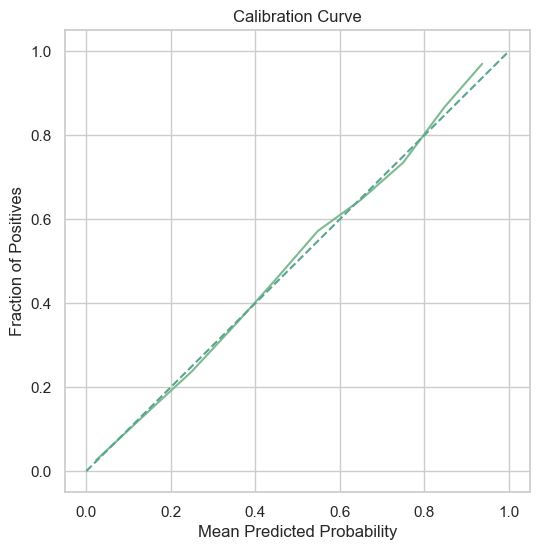

In [86]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.show()

**Evaluasi Kalibrasi Probabilitas Model**

Calibration Curve menunjukkan bahwa probabilitas yang dihasilkan model sangat dekat dengan garis diagonal (perfect calibration). Artinya, jika model memprediksi peluang 60%, maka secara aktual sekitar 60% memang benar-benar termasuk income >50K. Probabilitas yang dihasilkan dapat dipercaya sebagai estimasi risiko yang realistis.

Tidak terlihat indikasi overconfidence maupun underconfidence, sehingga estimasi risiko stabil di seluruh rentang probabilitas. Dikombinasikan dengan ROC-AUC dan PR-AUC yang tinggi, hal ini menegaskan bahwa model tidak hanya baik dalam membedakan kelas, tetapi juga akurat dalam mengukur tingkat risiko.

Bagi Bank A, probabilitas ini dapat langsung digunakan sebagai dasar risk scoring, penentuan threshold berbasis biaya, dan strategi risk-based pricing secara lebih presisi.
